In [1]:
import json
import pandas as pd

In [2]:
with open("datapin.json", "r", encoding="utf-8") as f:
    json_data = json.load(f)

In [3]:
records = json_data[0]["dataset_pl"]

In [4]:
df = pd.DataFrame(records)
df

,created_user_id,action,desc,created,data_date_key,session_id,new_value,old_value,pkg_order,duration,result_status
0,800822,distributorCfmDeliver,Xác nhận giao hàng cho COD: vudt51 - DƯƠNG TUẤ...,2025-06-09 15:52:26,20250609,20250609,None,None,1233875325,75,FAIL
1,800822,distributorCfmDeliver,Xác nhận giao hàng cho COD: vudt51 - DƯƠNG TUẤ...,2025-06-09 15:52:26,20250609,20250609,None,None,1754763006,18898,FAIL
2,800822,distributorCfmDeliver,Xác nhận giao hàng cho COD: vudt51 - DƯƠNG TUẤ...,2025-06-09 15:52:26,20250609,20250609,None,None,1830114930,697,FAIL
3,800822,distributorCfmDeliver,Xác nhận giao hàng cho COD: vudt51 - DƯƠNG TUẤ...,2025-06-09 15:52:26,20250609,20250609,None,None,1165733924,571,FAIL
4,800822,distributorCfmDeliver,Xác nhận giao hàng cho COD: vudt51 - DƯƠNG TUẤ...,2025-06-09 15:52:26,20250609,20250609,None,None,1558571191,163,FAIL
...,...,...,...,...,...,...,...,...,...,...,...
9067,801070,confirmTmpPickedPackageStatus,từ <b>Đã điều phối lấy hàng/Đang lấy hàng</b> ...,2025-06-11 17:58:48,20250611,20250611,3,12,1279898806,0,SUCCESS
9068,801070,PickupBill,Hóa đơn nhập hàng vào kho <b>BLH2149097803.T72...,2025-06-11 17:58:48,20250611,20250611,None,None,1935754352,0,FAIL
9069,801070,PickupBill,Hóa đơn nhập hàng vào kho <b>BLH2149097803.T72...,2025-06-11 17:58:48,20250611,20250611,None,None,1279898806,0,FAIL
9070,801070,updatePickedByCod,Cập nhật đã lấy hàng bởi COD,2025-06-11 17:58:48,20250611,20250611,1,,1935754352,0,SUCCESS


In [5]:
"""
Optimized Sequence Analysis Code with Start/End Point Analysis
==============================================================
Tối ưu hóa code phân tích sequence với:
- Cải thiện hiệu suất và memory usage
- Cấu trúc code rõ ràng hơn
- Xử lý lỗi và validation tốt hơn
- Sử dụng vectorization và parallel processing
- Phân tích start point và end point của sequence
"""

import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter, defaultdict
from itertools import combinations
import json
from typing import Dict, List, Tuple, Any, Optional
from dataclasses import dataclass
from functools import lru_cache
import warnings
warnings.filterwarnings('ignore')

# ================================
# 1. DATA CLASSES & CONFIGURATION
# ================================

@dataclass
class AnalysisConfig:
    """Configuration for sequence analysis"""
    min_pattern_support: float = 0.05
    min_subsequence_length: int = 2
    max_subsequence_length: int = 5
    n_clusters: int = 5
    anomaly_threshold: float = 0.95
    required_fields: List[str] = None
    
    def __post_init__(self):
        if self.required_fields is None:
            self.required_fields = ['created_user_id', 'session_id', 'action', 'desc', 'created', 'pkg_order']

@dataclass
class SequenceMetrics:
    """Container for sequence metrics"""
    session_id: str
    sequence: str
    action_count: int
    unique_action_count: int
    action_diversity: float
    start_point: str = None
    end_point: str = None
    total_time: float = 0.0
    success_rate: float = 0.0
    efficiency_score: float = 0.0
    performance_category: str = 'Unknown'
    actions: List[Dict] = None

@dataclass
class StartEndPointAnalysis:
    """Container for start/end point analysis results"""
    start_points: Dict[str, Dict] = None
    end_points: Dict[str, Dict] = None
    start_end_patterns: Dict[str, Dict] = None
    journey_flows: List[Dict] = None
    
    def __post_init__(self):
        if self.start_points is None:
            self.start_points = {}
        if self.end_points is None:
            self.end_points = {}
        if self.start_end_patterns is None:
            self.start_end_patterns = {}
        if self.journey_flows is None:
            self.journey_flows = []

class SequenceAnalyzer:
    """Main analyzer class with optimized methods"""
    
    def __init__(self, config: Optional[AnalysisConfig] = None):
        self.config = config or AnalysisConfig()
        self.df_clean = None
        self.cycles = []
        self.analysis_results = {}
        self.start_end_analysis = StartEndPointAnalysis()
        
    def validate_and_prepare_data(self, input_data: List[Dict]) -> pd.DataFrame:
        """
        Stage 1: Optimized data validation and preparation
        """
        # Convert to DataFrame efficiently
        #
        # df = pd.DataFrame(input_data)

        # Validate required fields
        missing_fields = [field for field in self.config.required_fields if field not in df.columns]
        if missing_fields:
            raise ValueError(f"Missing required fields: {missing_fields}")
        
        # Remove records with null values in required fields
        total_records = len(df)
        df_clean = df.dropna(subset=self.config.required_fields).copy()
        
        # Optimize data types
        df_clean['timestamp'] = pd.to_datetime(df_clean['created'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
        df_clean['group'] = df_clean['created_user_id'].astype(str) + '_' + df_clean['session_id'].astype(str)
                
        # Store validation metrics
        validation_rate = len(df_clean) / total_records if total_records > 0 else 0
        self.analysis_results['validation'] = {
            'total_records': total_records,
            'valid_records': len(df_clean),
            'validation_rate': f"{validation_rate * 100:.2f}%",
            'null_records_removed': total_records - len(df_clean)
        }
        
        self.df_clean = df_clean
        return df_clean
    
    def create_sessions_and_cycles(self) -> List[SequenceMetrics]:
        """
        Stage 2 & 3: Optimized session grouping and cycle creation with start/end points
        """
        if self.df_clean is None:
            raise ValueError("Data must be validated first")
        
        # Group by session efficiently using groupby
        grouped = self.df_clean.groupby(['session_id'])
        
        cycles = []
        for (session_id), group in grouped:
            # Sort by timestamp
            actions_df = group.sort_values('timestamp')
            actions_list = actions_df.to_dict('records')
            
            # Create action sequence
            action_sequence = actions_df['action'].tolist()
            sequence_string = ' -> '.join(action_sequence)
            
            # Extract start and end points
            start_point = action_sequence[0] if action_sequence else None
            end_point = action_sequence[-1] if action_sequence else None
            
            # Calculate metrics efficiently
            total_time = actions_df.get('duration', pd.Series([0] * len(actions_df))).sum()
            success_count = (actions_df.get('result_status') == 'SUCCESS').sum()
            success_rate = success_count / len(actions_list) if len(actions_list) > 0 else 0
            
            # Create cycle metrics
            unique_actions = len(set(action_sequence))
            action_diversity = unique_actions / len(action_sequence) if len(action_sequence) > 0 else 0
            
            cycle = SequenceMetrics(
                session_id=str(session_id),
                sequence=sequence_string,
                action_count=len(action_sequence),
                unique_action_count=unique_actions,
                action_diversity=action_diversity,
                start_point=start_point,
                end_point=end_point,
                total_time=float(total_time),
                success_rate=success_rate,
                actions=actions_list
            )
            
            cycles.append(cycle)
        
        self.cycles = cycles
        
        # Calculate session statistics
        self._calculate_session_statistics()
        return cycles
    
    def _calculate_session_statistics(self):
        """Calculate and store session-level statistics"""
        if not self.cycles:
            return
        
        cycles_df = pd.DataFrame([
            {
                'action_count': c.action_count,
                'unique_action_count': c.unique_action_count,
                'success_rate': c.success_rate,
                'total_time': c.total_time
            }
            for c in self.cycles
        ])
        
        self.analysis_results['session_stats'] = {
            'session_count': len(self.cycles),
            'avg_actions_per_session': cycles_df['action_count'].mean(),
            'avg_unique_actions_per_session': cycles_df['unique_action_count'].mean(),
            'avg_success_rate': cycles_df['success_rate'].mean(),
            'sequence_diversity': len(set(c.sequence for c in self.cycles)) / len(self.cycles)
        }
    
    def analyze_start_end_points(self) -> StartEndPointAnalysis:
        """
        Comprehensive analysis of start points and end points in sequences
        """
        if not self.cycles:
            raise ValueError("Cycles must be created first")
        
        # Initialize counters
        start_point_counter = Counter()
        end_point_counter = Counter()
        start_end_patterns = Counter()
        journey_flows = []
        
        # Collect metrics for each start/end point
        start_point_metrics = defaultdict(lambda: {'success_rates': [], 'durations': [], 'counts': 0})
        end_point_metrics = defaultdict(lambda: {'success_rates': [], 'durations': [], 'counts': 0})
        
        # Process all cycles
        for cycle in self.cycles:
            if cycle.start_point and cycle.end_point:
                # Count occurrences
                start_point_counter[cycle.start_point] += 1
                end_point_counter[cycle.end_point] += 1
                
                # Count start-end patterns
                pattern = f"{cycle.start_point} → {cycle.end_point}"
                start_end_patterns[pattern] += 1
                
                # Collect metrics
                start_point_metrics[cycle.start_point]['success_rates'].append(cycle.success_rate)
                start_point_metrics[cycle.start_point]['durations'].append(cycle.total_time)
                start_point_metrics[cycle.start_point]['counts'] += 1
                
                end_point_metrics[cycle.end_point]['success_rates'].append(cycle.success_rate)
                end_point_metrics[cycle.end_point]['durations'].append(cycle.total_time)
                end_point_metrics[cycle.end_point]['counts'] += 1
                
                # Create journey flow
                journey_flows.append({
                    'session_id': cycle.session_id,
                    'start_point': cycle.start_point,
                    'end_point': cycle.end_point,
                    'journey_length': cycle.action_count,
                    'success_rate': cycle.success_rate,
                    'total_time': cycle.total_time,
                    'sequence': cycle.sequence
                })
        
        total_sequences = len(self.cycles)
        
        # Process start points analysis
        start_points_analysis = {}
        for start_point, count in start_point_counter.items():
            metrics = start_point_metrics[start_point]
            start_points_analysis[start_point] = {
                'frequency': count,
                'percentage': f"{(count / total_sequences) * 100:.2f}%",
                'avg_success_rate': f"{np.mean(metrics['success_rates']) * 100:.2f}%" if metrics['success_rates'] else "0%",
                'avg_duration': round(np.mean(metrics['durations']), 2) if metrics['durations'] else 0,
                'sequences_started': count
            }
        
        # Process end points analysis
        end_points_analysis = {}
        for end_point, count in end_point_counter.items():
            metrics = end_point_metrics[end_point]
            end_points_analysis[end_point] = {
                'frequency': count,
                'percentage': f"{(count / total_sequences) * 100:.2f}%",
                'avg_success_rate': f"{np.mean(metrics['success_rates']) * 100:.2f}%" if metrics['success_rates'] else "0%",
                'avg_duration': round(np.mean(metrics['durations']), 2) if metrics['durations'] else 0,
                'sequences_ended': count
            }
        
        # Process start-end patterns
        start_end_patterns_analysis = {}
        for pattern, count in start_end_patterns.items():
            start_end_patterns_analysis[pattern] = {
                'frequency': count,
                'percentage': f"{(count / total_sequences) * 100:.2f}%",
                'pattern_strength': count / total_sequences
            }
        
        # Sort by frequency
        start_points_sorted = dict(sorted(start_points_analysis.items(), 
                                        key=lambda x: x[1]['frequency'], reverse=True))
        end_points_sorted = dict(sorted(end_points_analysis.items(), 
                                      key=lambda x: x[1]['frequency'], reverse=True))
        patterns_sorted = dict(sorted(start_end_patterns_analysis.items(), 
                                    key=lambda x: x[1]['frequency'], reverse=True))
        
        # Update analysis object
        self.start_end_analysis = StartEndPointAnalysis(
            start_points=start_points_sorted,
            end_points=end_points_sorted,
            start_end_patterns=patterns_sorted,
            journey_flows=journey_flows
        )
        
        # Store in analysis results
        self.analysis_results['start_end_analysis'] = {
            'start_points': start_points_sorted,
            'end_points': end_points_sorted,
            'start_end_patterns': patterns_sorted,
            'journey_summary': {
                'total_unique_start_points': len(start_points_sorted),
                'total_unique_end_points': len(end_points_sorted),
                'total_unique_patterns': len(patterns_sorted),
                'most_common_start': max(start_points_sorted.items(), key=lambda x: x[1]['frequency'])[0] if start_points_sorted else None,
                'most_common_end': max(end_points_sorted.items(), key=lambda x: x[1]['frequency'])[0] if end_points_sorted else None,
                'most_common_pattern': max(patterns_sorted.items(), key=lambda x: x[1]['frequency'])[0] if patterns_sorted else None
            }
        }
        
        return self.start_end_analysis
    
    def analyze_journey_paths(self) -> Dict:
        """
        Analyze complete journey paths from start to end
        """
        if not self.start_end_analysis.journey_flows:
            raise ValueError("Start-end analysis must be performed first")
        
        # Group journeys by start-end pattern
        pattern_groups = defaultdict(list)
        for journey in self.start_end_analysis.journey_flows:
            pattern = f"{journey['start_point']} → {journey['end_point']}"
            pattern_groups[pattern].append(journey)
        
        # Analyze each pattern group
        pattern_analysis = {}
        for pattern, journeys in pattern_groups.items():
            # Calculate statistics
            journey_lengths = [j['journey_length'] for j in journeys]
            success_rates = [j['success_rate'] for j in journeys]
            durations = [j['total_time'] for j in journeys]
            
            pattern_analysis[pattern] = {
                'total_journeys': len(journeys),
                'avg_journey_length': round(np.mean(journey_lengths), 2),
                'min_journey_length': min(journey_lengths),
                'max_journey_length': max(journey_lengths),
                'avg_success_rate': f"{np.mean(success_rates) * 100:.2f}%",
                'avg_duration': round(np.mean(durations), 2),
                'efficiency_score': round(np.mean(success_rates) / np.mean(journey_lengths) * 100, 2),
                'sample_sequences': [j['sequence'] for j in journeys[:3]]  # Show top 3 examples
            }
        
        # Sort by efficiency score
        pattern_analysis_sorted = dict(sorted(pattern_analysis.items(), 
                                            key=lambda x: x[1]['efficiency_score'], reverse=True))
        
        self.analysis_results['journey_path_analysis'] = pattern_analysis_sorted
        return pattern_analysis_sorted
    
    def identify_optimal_paths(self) -> Dict:
        """
        Identify optimal paths based on success rate and efficiency
        """
        if 'journey_path_analysis' not in self.analysis_results:
            self.analyze_journey_paths()
        
        journey_analysis = self.analysis_results['journey_path_analysis']
        
        # Find optimal paths
        optimal_paths = {}
        
        # Top performing paths by efficiency
        efficiency_sorted = sorted(journey_analysis.items(), 
                                 key=lambda x: x[1]['efficiency_score'], reverse=True)
        
        # Top performing paths by success rate
        success_sorted = sorted(journey_analysis.items(), 
                              key=lambda x: float(x[1]['avg_success_rate'].rstrip('%')), reverse=True)
        
        # Shortest paths
        length_sorted = sorted(journey_analysis.items(), 
                             key=lambda x: x[1]['avg_journey_length'])
        
        optimal_paths = {
            'most_efficient_paths': dict(efficiency_sorted[:5]),
            'highest_success_paths': dict(success_sorted[:5]),
            'shortest_paths': dict(length_sorted[:5]),
            'recommendations': {
                'best_overall_path': efficiency_sorted[0][0] if efficiency_sorted else None,
                'most_reliable_path': success_sorted[0][0] if success_sorted else None,
                'quickest_path': length_sorted[0][0] if length_sorted else None
            }
        }
        
        self.analysis_results['optimal_paths'] = optimal_paths
        return optimal_paths
    
    def calculate_performance_metrics(self):
        """
        Stage 4: Optimized performance metrics calculation
        """
        if not self.cycles:
            raise ValueError("Cycles must be created first")
        
        # Convert to DataFrame for vectorized operations
        metrics_data = []
        for cycle in self.cycles:
            metrics_data.append({
                'total_time': cycle.total_time,
                'success_rate': cycle.success_rate,
                'action_count': cycle.action_count
            })
        
        df_metrics = pd.DataFrame(metrics_data)
        
        # Calculate percentiles efficiently
        time_percentiles = df_metrics['total_time'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
        success_percentiles = df_metrics['success_rate'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
        
        # Calculate efficiency scores and performance categories vectorized
        efficiency_scores = (df_metrics['success_rate'] / np.maximum(df_metrics['total_time'], 1)) * 1000
        
        # Update cycles with performance metrics
        for i, cycle in enumerate(self.cycles):
            cycle.efficiency_score = efficiency_scores.iloc[i]
            
            # Determine performance category
            success_rate = cycle.success_rate
            time_percentile = self._get_percentile_rank(cycle.total_time, df_metrics['total_time'])
            
            if success_rate >= 0.9 and time_percentile <= 30:
                cycle.performance_category = 'Excellent'
            elif success_rate >= 0.7 and time_percentile <= 50:
                cycle.performance_category = 'Good'
            elif success_rate >= 0.5:
                cycle.performance_category = 'Average'
            else:
                cycle.performance_category = 'Poor'
        
        # Store performance results
        self.analysis_results['performance'] = {
            'avg_cycle_time': df_metrics['total_time'].mean(),
            'avg_success_rate': df_metrics['success_rate'].mean(),
            'time_percentiles': time_percentiles.to_dict(),
            'success_percentiles': success_percentiles.to_dict(),
            'performance_distribution': Counter([c.performance_category for c in self.cycles])
        }
    
    @staticmethod
    def _get_percentile_rank(value: float, series: pd.Series) -> float:
        """Calculate percentile rank efficiently"""
        return (series < value).sum() / len(series) * 100
    
    @lru_cache(maxsize=1000)
    def _extract_subsequences_cached(self, sequence: str) -> Tuple[str, ...]:
        """Cached subsequence extraction for better performance"""
        actions = sequence.split(' -> ')
        subsequences = []
        
        for length in range(self.config.min_subsequence_length, 
                          min(len(actions) + 1, self.config.max_subsequence_length + 1)):
            for i in range(len(actions) - length + 1):
                subseq = ' -> '.join(actions[i:i + length])
                subsequences.append(subseq)
        
        return tuple(subsequences)
    
    def find_frequent_patterns(self) -> List[Dict]:
        """
        Optimized frequent pattern mining with caching
        """
        if not self.cycles:
            raise ValueError("Cycles must be created first")
        
        # Use counter for efficient counting
        all_subsequences = []
        for cycle in self.cycles:
            subsequences = self._extract_subsequences_cached(cycle.sequence)
            all_subsequences.extend(subsequences)
        
        # Count patterns efficiently
        pattern_counts = Counter(all_subsequences)
        total_cycles = len(self.cycles)
        
        # Filter and format results
        frequent_patterns = []
        for pattern, count in pattern_counts.items():
            support = count / total_cycles
            if support >= self.config.min_pattern_support:
                frequent_patterns.append({
                    'pattern': pattern,
                    'count': count,
                    'support': support,
                    'frequency_percentage': f"{support * 100:.2f}%"
                })
        
        # Sort by support
        frequent_patterns.sort(key=lambda x: x['support'], reverse=True)
        
        self.analysis_results['frequent_patterns'] = frequent_patterns
        return frequent_patterns
    
    def analyze_transitions(self) -> Tuple[Dict, Dict]:
        """
        Optimized transition analysis
        """
        if not self.cycles:
            raise ValueError("Cycles must be created first")
        
        transition_counts = Counter()
        action_counts = Counter()
        
        # Process all cycles in one pass
        for cycle in self.cycles:
            actions = cycle.sequence.split(' -> ')
            
            # Count actions
            action_counts.update(actions)
            
            # Count transitions
            for i in range(len(actions) - 1):
                transition = f"{actions[i]} -> {actions[i+1]}"
                transition_counts[transition] += 1
        
        # Calculate probabilities efficiently
        transition_probabilities = {}
        for transition, count in transition_counts.items():
            from_action = transition.split(' -> ')[0]
            probability = count / action_counts[from_action]
            transition_probabilities[transition] = {
                'count': count,
                'probability': probability,
                'percentage': f"{probability * 100:.2f}%"
            }
        
        # Sort by count
        sorted_transitions = dict(
            sorted(transition_probabilities.items(), 
                  key=lambda x: x[1]['count'], reverse=True)
        )
        
        self.analysis_results['transitions'] = sorted_transitions
        self.analysis_results['action_frequencies'] = dict(action_counts)
        
        return sorted_transitions, dict(action_counts)
    
    def detect_anomalies(self) -> List[Dict]:
        """
        Optimized anomaly detection including start/end point anomalies
        """
        if not self.cycles:
            raise ValueError("Cycles must be created first")
        
        # Prepare data for vectorized operations  
        metrics_df = pd.DataFrame([
            {
                'action_count': c.action_count,
                'success_rate': c.success_rate,
                'efficiency_score': c.efficiency_score,
                'sequence': c.sequence,
                'start_point': c.start_point,
                'end_point': c.end_point
            }
            for c in self.cycles
        ])
        
        # Calculate percentiles
        length_percentiles = metrics_df['action_count'].quantile([0.05, 0.95])
        success_percentiles = metrics_df['success_rate'].quantile([0.05, 0.95])
        efficiency_percentiles = metrics_df['efficiency_score'].quantile([0.05, 0.95])
        
        # Count sequence and start/end point occurrences
        sequence_counts = metrics_df['sequence'].value_counts()
        start_point_counts = metrics_df['start_point'].value_counts()
        end_point_counts = metrics_df['end_point'].value_counts()
        
        anomalies = []
        for i, cycle in enumerate(self.cycles):
            anomaly_reasons = []
            
            # Check length anomaly
            if (cycle.action_count < length_percentiles[0.05] or 
                cycle.action_count > length_percentiles[0.95]):
                percentile = self._get_percentile_rank(cycle.action_count, metrics_df['action_count'])
                anomaly_reasons.append(f"Unusual length (percentile: {percentile:.1f}%)")
            
            # Check success rate anomaly
            if cycle.success_rate < success_percentiles[0.05]:
                percentile = self._get_percentile_rank(cycle.success_rate, metrics_df['success_rate'])
                anomaly_reasons.append(f"Very low success rate (percentile: {percentile:.1f}%)")
            
            # Check unique sequence
            if sequence_counts[cycle.sequence] == 1 and len(self.cycles) > 10:
                anomaly_reasons.append("Unique sequence pattern")
            
            # Check efficiency
            if cycle.efficiency_score < efficiency_percentiles[0.05]:
                anomaly_reasons.append("Very low efficiency")
            
            # Check rare start/end points
            if cycle.start_point and start_point_counts[cycle.start_point] == 1 and len(self.cycles) > 10:
                anomaly_reasons.append("Rare start point")
            
            if cycle.end_point and end_point_counts[cycle.end_point] == 1 and len(self.cycles) > 10:
                anomaly_reasons.append("Rare end point")
            
            if anomaly_reasons:
                anomalies.append({
                    'cycle_index': i,
                    'session_id': cycle.session_id,
                    'sequence': cycle.sequence,
                    'start_point': cycle.start_point,
                    'end_point': cycle.end_point,
                    'anomaly_reasons': anomaly_reasons,
                    'metrics': {
                        'action_count': cycle.action_count,
                        'success_rate': f"{cycle.success_rate * 100:.2f}%",
                        'efficiency_score': round(cycle.efficiency_score, 2)
                    }
                })
        
        self.analysis_results['anomalies'] = anomalies
        return anomalies
    
    def create_comprehensive_summary(self) -> Dict:
        """
        Create comprehensive analysis summary including start/end point analysis
        """
        if not self.analysis_results:
            raise ValueError("Analysis must be performed first")
        
        summary = {
            'data_quality': self.analysis_results.get('validation', {}),
            'session_overview': self.analysis_results.get('session_stats', {}),
            'performance_metrics': self.analysis_results.get('performance', {}),
            'frequent_patterns': self.analysis_results.get('frequent_patterns', []),          
            'pattern_analysis': {
                'total_patterns_found': len(self.analysis_results.get('frequent_patterns', [])),
                'top_patterns': self.analysis_results.get('frequent_patterns', [])[:5]
            },
            'transition_analysis': {
                'total_transitions': len(self.analysis_results.get('transitions', {})),
                'top_transitions': dict(list(self.analysis_results.get('transitions', {}).items())[:5])
            },
            'start_end_point_analysis': self.analysis_results.get('start_end_analysis', {}),
            'journey_path_analysis': self.analysis_results.get('journey_path_analysis', {}),
            'optimal_paths': self.analysis_results.get('optimal_paths', {}),
            'anomaly_detection': {
                'total_anomalies': len(self.analysis_results.get('anomalies', [])),
                'anomaly_rate': f"{len(self.analysis_results.get('anomalies', [])) / len(self.cycles) * 100:.2f}%" if self.cycles else "0%",
                'sample_anomalies': self.analysis_results.get('anomalies', [])[:3]
            }
        }
        
        return summary
    
    def run_full_analysis(self, input_data: List[Dict]) -> Dict:
        """
        Run complete optimized analysis pipeline with start/end point analysis
        """
        try:
            # Stage 1: Data validation and preparation
            print("Stage 1: Validating and preparing data...")
            self.validate_and_prepare_data(input_data)
            
            # Stage 2-3: Session grouping and cycle creation
            print("Stage 2-3: Creating sessions and cycles...")
            self.create_sessions_and_cycles()
            
            # Stage 4: Performance metrics
            print("Stage 4: Calculating performance metrics...")
            self.calculate_performance_metrics()
            
            # Stage 5: Start/End point analysis
            print("Stage 5: Analyzing start and end points...")
            self.analyze_start_end_points()
            
            # Stage 6: Journey path analysis
            print("Stage 6: Analyzing journey paths...")
            self.analyze_journey_paths()
            
            # Stage 7: Identify optimal paths
            print("Stage 7: Identifying optimal paths...")
            self.identify_optimal_paths()
            
            # Stage 8: Pattern analysis
            print("Stage 8: Analyzing patterns...")
            self.find_frequent_patterns()
            
            # Stage 9: Transition analysis
            print("Stage 9: Analyzing transitions...")
            self.analyze_transitions()
            
            # Stage 10: Anomaly detection
            print("Stage 10: Detecting anomalies...")
            self.detect_anomalies()
            
            # Create final summary
            print("Creating comprehensive summary...")
            summary = self.create_comprehensive_summary()
            
            return {
                'sequence_analysis_summary': summary,
                'cycles_count': len(self.cycles)
            }
            
        except Exception as e:
            return {
                'error': str(e),
                'stage': 'analysis_pipeline'
            }

# ================================
# Main execution function
# ================================

def run_optimized_analysis(input_data: List[Dict], config: Optional[AnalysisConfig] = None) -> Dict:
    """
    Main function to run optimized sequence analysis with start/end point analysis
    
    Args:
        input_data: List of dictionaries containing sequence data
        config: Optional configuration object
    
    Returns:
        Dictionary containing analysis results including start/end point insights
    """
    analyzer = SequenceAnalyzer(config)
    return analyzer.run_full_analysis(input_data)

# ================================
# USAGE 
#input_data = _input.all()[0].json.dataset_pl
input_data = df

# Configure analysis
config = AnalysisConfig(
    min_pattern_support=0.05,
    min_subsequence_length=2,
    max_subsequence_length=6,
    n_clusters=10
)

# Example usage function
def analyze_sequences_with_start_end_points(input_data):
    """
    Example function showing how to use the enhanced sequence analyzer
    """
    try:
        # Run the complete analysis
        results = run_optimized_analysis(input_data, config)
        
        # Extract specific insights
        if 'sequence_analysis_summary' in results:
            summary = results['sequence_analysis_summary']
            
            # Print key insights about start/end points
            print("=== START/END POINT ANALYSIS INSIGHTS ===")
            
            if 'start_end_point_analysis' in summary:
                start_end_analysis = summary['start_end_point_analysis']
                
                # Most common entry points
                print("\n🚀 TOP ENTRY POINTS:")
                if 'start_points' in start_end_analysis:
                    for i, (start_point, data) in enumerate(list(start_end_analysis['start_points'].items())[:5]):
                        print(f"  {i+1}. {start_point}: {data['percentage']} (Success: {data['avg_success_rate']})")
                
                # Most common exit points
                print("\n🏁 TOP EXIT POINTS:")
                if 'end_points' in start_end_analysis:
                    for i, (end_point, data) in enumerate(list(start_end_analysis['end_points'].items())[:5]):
                        print(f"  {i+1}. {end_point}: {data['percentage']} (Success: {data['avg_success_rate']})")
                
                # Most common journey patterns
                print("\n🛤️  TOP JOURNEY PATTERNS:")
                if 'start_end_patterns' in start_end_analysis:
                    for i, (pattern, data) in enumerate(list(start_end_analysis['start_end_patterns'].items())[:5]):
                        print(f"  {i+1}. {pattern}: {data['percentage']}")
            
            # Optimal paths recommendations
            if 'optimal_paths' in summary:
                optimal_paths = summary['optimal_paths']
                print("\n🎯 OPTIMAL PATH RECOMMENDATIONS:")
                
                if 'recommendations' in optimal_paths:
                    recs = optimal_paths['recommendations']
                    if recs.get('best_overall_path'):
                        print(f"  • Best Overall: {recs['best_overall_path']}")
                    if recs.get('most_reliable_path'):
                        print(f"  • Most Reliable: {recs['most_reliable_path']}")
                    if recs.get('quickest_path'):
                        print(f"  • Quickest: {recs['quickest_path']}")
        
        return results
        
    except Exception as e:
        print(f"Error in analysis: {str(e)}")
        return {'error': str(e)}

# Run analysis (uncomment when you have actual data)
results = analyze_sequences_with_start_end_points(input_data)

return results

Stage 1: Validating and preparing data...
Stage 2-3: Creating sessions and cycles...
Stage 4: Calculating performance metrics...
Stage 5: Analyzing start and end points...
Stage 6: Analyzing journey paths...
Stage 7: Identifying optimal paths...
Stage 8: Analyzing patterns...
Stage 9: Analyzing transitions...
Stage 10: Detecting anomalies...
Creating comprehensive summary...
=== START/END POINT ANALYSIS INSIGHTS ===

🚀 TOP ENTRY POINTS:
  1. verifySessionPackage: 50.00% (Success: 56.64%)
  2. distributorCfmDeliver: 25.00% (Success: 50.00%)
  3. updateDeliverWorkshiftByCod: 25.00% (Success: 44.53%)

🏁 TOP EXIT POINTS:
  1. smartScaleScanningPackage: 75.00% (Success: 54.43%)
  2. verifySessionPackage: 25.00% (Success: 44.53%)

🛤️  TOP JOURNEY PATTERNS:
  1. verifySessionPackage → smartScaleScanningPackage: 50.00%
  2. distributorCfmDeliver → smartScaleScanningPackage: 25.00%
  3. updateDeliverWorkshiftByCod → verifySessionPackage: 25.00%

🎯 OPTIMAL PATH RECOMMENDATIONS:
  • Best Overall:

SyntaxError: 'return' outside function (1928346954.py, line 795)

In [6]:
results

{'sequence_analysis_summary': {'data_quality': {'total_records': 9072,
   'valid_records': 9063,
   'validation_rate': '99.90%',
   'null_records_removed': 9},
  'session_overview': {'session_count': 4,
   'avg_actions_per_session': np.float64(2265.75),
   'avg_unique_actions_per_session': np.float64(41.0),
   'avg_success_rate': np.float64(0.5195345174962163),
   'sequence_diversity': 1.0},
  'performance_metrics': {'avg_cycle_time': np.float64(18428582.0),
   'avg_success_rate': np.float64(0.5195345174962163),
   'time_percentiles': {0.1: 1138692.5000000002,
    0.25: 2819521.25,
    0.5: 16824384.0,
    0.75: 32433444.75,
    0.9: 37001829.9},
   'success_percentiles': {0.1: 0.46173490924440697,
    0.25: 0.48633389615871675,
    0.5: 0.5271940667490729,
    0.75: 0.5603946880865723,
    0.9: 0.5712064863457401},
   'performance_distribution': Counter({'Average': 3, 'Poor': 1})},
  'frequent_patterns': [{'pattern': 'distributorCfmDeliver -> distributorCfmDeliver',
    'count': 2388,

In [7]:
with open("datapin.json", "r", encoding="utf-8") as f:
    json_data = json.load(f)

In [8]:
import json

# Lấy dữ liệu từ input
input = _input.all()
input = input[0].json

result = input.get('result')
content = result.get('content')
text = content[0].get('text')

pkg_orders = text
pkg_orders_json = json.loads(pkg_orders)

# Trích xuất pkg_orders
pkg_orders = list(set([str(pkg_order['pkg_order']) for pkg_order in pkg_orders_json]))

return {'pkg_orders': pkg_orders}

NameError: name '_input' is not defined

In [ ]:
df

,created_user_id,action,desc,created,data_date_key,session_id,new_value,old_value,pkg_order,duration,result_status
0,800822,distributorCfmDeliver,Xác nhận giao hàng cho COD: vudt51 - DƯƠNG TUẤ...,2025-06-09 15:52:26,20250609,20250609,None,None,1233875325,75,FAIL
1,800822,distributorCfmDeliver,Xác nhận giao hàng cho COD: vudt51 - DƯƠNG TUẤ...,2025-06-09 15:52:26,20250609,20250609,None,None,1754763006,18898,FAIL
2,800822,distributorCfmDeliver,Xác nhận giao hàng cho COD: vudt51 - DƯƠNG TUẤ...,2025-06-09 15:52:26,20250609,20250609,None,None,1830114930,697,FAIL
3,800822,distributorCfmDeliver,Xác nhận giao hàng cho COD: vudt51 - DƯƠNG TUẤ...,2025-06-09 15:52:26,20250609,20250609,None,None,1165733924,571,FAIL
4,800822,distributorCfmDeliver,Xác nhận giao hàng cho COD: vudt51 - DƯƠNG TUẤ...,2025-06-09 15:52:26,20250609,20250609,None,None,1558571191,163,FAIL
...,...,...,...,...,...,...,...,...,...,...,...
9067,801070,confirmTmpPickedPackageStatus,từ <b>Đã điều phối lấy hàng/Đang lấy hàng</b> ...,2025-06-11 17:58:48,20250611,20250611,3,12,1279898806,0,SUCCESS
9068,801070,PickupBill,Hóa đơn nhập hàng vào kho <b>BLH2149097803.T72...,2025-06-11 17:58:48,20250611,20250611,None,None,1935754352,0,FAIL
9069,801070,PickupBill,Hóa đơn nhập hàng vào kho <b>BLH2149097803.T72...,2025-06-11 17:58:48,20250611,20250611,None,None,1279898806,0,FAIL
9070,801070,updatePickedByCod,Cập nhật đã lấy hàng bởi COD,2025-06-11 17:58:48,20250611,20250611,1,,1935754352,0,SUCCESS


1. Logic lấy data tới từng đối tượng
- Lấy data action của Nhân viên bưu cục
- Lọc data đơn hàng
- Lấy data id theo từng đối tượng dựa vào đơn hàng (pkg_order)
- Lấy data cụ thể theo từng đối tượng dựa vào id 

Phân tích theo đối tượng
1. Shop

In [ ]:
with open("datapin_shop.json", "r", encoding="utf-8") as f:
    json_data = json.load(f)

In [ ]:
records = json_data[0]["dataset_shop"]

In [ ]:
df_shops = pd.DataFrame(records)
df_shops

,shop_id,shop_order,shop_name,shop_type
0,60c8878b-91e8-48dd-9c44-47760a784c68,19617420,nguyễn lượng,1
1,60cc2bd7-0a54-43a3-94de-40b10a6e4c24,19642397,Athena,1
2,60dfdb97-049c-438e-90f7-401d0a6e4d59,19759339,Đào Thị Hà,0
3,5fbccb28-2288-4667-8364-4a3b0a6e4c25,18297104,Doscom,0
4,5fc3c57b-39ec-4a1e-865a-4a280a784c65,18327588,Tiện ích Xanh - Chi Nhánh Linh Đàm 2,1
...,...,...,...,...
922,f75e8fc3-df0a-4b94-bdf9-682ec7b365a2,22700122,Xưởng Chuyên Hàng Da,1
923,fab42c05-75d6-47bd-b9e5-50409fb4b7e4,22671998,Apple No1 - 178 Thái Hà,0
924,fc41a485-9206-4670-a155-14f260e85587,22907179,Shop Hương Trần 17,1
925,fe7dcefe-a0a3-49be-814a-92652f756d81,22449901,Tổng kho lk VP,1


12/06/2025

In [126]:
import json
import pandas as pd

In [127]:
with open("data_final_shop.json", "r", encoding="utf-8") as f:
    json_data = json.load(f)

In [128]:
records = json_data

In [129]:
df = pd.DataFrame(records)

In [ ]:
#df.to_csv("data_final_shop.csv", index=False)

In [210]:
df = pd.read_csv("data_final_shop.csv")

In [211]:
df = df.sort_values(["pkg_order", "created"], ascending = [True, True])

In [212]:
df

,created_user_id,action,desc,created,data_date_key,session_id,new_value,old_value,pkg_order,duration,...,shop_order,shop_name,shop_status_name,shop_type_name,shop__created,shop__seniority,shop__categories,address__ward_name,address__district_name,address__province_name
1449,800940,distributorCfmDeliver,Xác nhận giao hàng cho COD: huyenhtm1 - HOÀNG ...,2025-06-12 15:11:32,20250612,20250612,NaN,NaN,1000273791,0,...,19081507,Shop quần áo giá rẻ,Đang làm việc,Pro (B2C),2021-04-04 13:40:27,51,"[""fashion_new"",""houseware""]",NaN,Quận Từ Liêm,Hà Nội
4300,801070,assignCodPicking,Xác nhận cod NGUYỄN DUY PHƯƠNG đi lấy hàng,2025-06-11 17:29:29,20250611,20250611,12,2,1000465009,2156,...,22744433,Hải híp boutique,Đang làm việc,Pro (B2C),2024-10-13 16:34:53,8,NaN,Phường Ngã Tư Sở,Quận Đống Đa,Hà Nội
3589,801061,changeAttributeForSurplus,Thay đổi kho hiện tại từ sang BC Hoàng Cầu (HN),2025-06-12 15:19:44,20250612,20250612,20047,0,1000793270,0,...,22220660,SHOP Thời Trang,Đang làm việc,Pro (B2C),2023-06-28 21:41:41,24,"[""accessories""]",Phường Hội Hợp,Thành phố Vĩnh Yên,Vĩnh Phúc
3590,801061,privateNotePackage,Phiên kiểm VS2663552: Xác nhận thừa hàng tại k...,2025-06-12 15:19:44,20250612,20250612,NaN,NaN,1000793270,207,...,22220660,SHOP Thời Trang,Đang làm việc,Pro (B2C),2023-06-28 21:41:41,24,"[""accessories""]",Phường Hội Hợp,Thành phố Vĩnh Yên,Vĩnh Phúc
3600,801061,distributorCfmDeliver,Xác nhận giao hàng cho COD: binhnt251 - NGUYỄN...,2025-06-12 15:23:11,20250612,20250612,NaN,NaN,1000793270,0,...,22220660,SHOP Thời Trang,Đang làm việc,Pro (B2C),2023-06-28 21:41:41,24,"[""accessories""]",Phường Hội Hợp,Thành phố Vĩnh Yên,Vĩnh Phúc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,800832,verifySessionPackage,Xác nhận có hàng tại phiên kiểm kho 822019,2025-06-12 15:18:50,20250612,20250612,NaN,NaN,4010470527,1853,...,22845716,BOXME VIỆT NAM - HÀNG NHẸ,Đang làm việc,Top Brand,2025-02-07 11:41:25,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội
3365,801061,changeTransferStation,Thay đổi kho đích từ sang BC Lê Văn Thiêm (HN),2025-06-11 23:48:10,20250611,20250611,27064,20047,4010470806,0,...,22845716,BOXME VIỆT NAM - HÀNG NHẸ,Đang làm việc,Top Brand,2025-02-07 11:41:25,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội
3367,801061,updateDelayDeliveringByCod,Cập nhật delay giao hàng bởi COD,2025-06-11 23:48:10,20250611,20250611,4,NaN,4010470806,1,...,22845716,BOXME VIỆT NAM - HÀNG NHẸ,Đang làm việc,Top Brand,2025-02-07 11:41:25,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội
3370,801061,confirmTmpDeliveredPackageStatus,từ <b>Đã điều phối giao hàng/Đang giao hàng</b...,2025-06-11 23:48:10,20250611,20250611,10,4,4010470806,0,...,22845716,BOXME VIỆT NAM - HÀNG NHẸ,Đang làm việc,Top Brand,2025-02-07 11:41:25,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội


1. Tiền xử lý dữ liệu

In [213]:
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Preprocess the DataFrame to ensure it has the required structure and data types.
    """
    # Ensure 'created' is in datetime format
    df['created'] = pd.to_datetime(df['created'], errors='coerce')
    missing_summary = df.isnull().sum()
    df = df.drop_duplicates(keep='first')
    
    return df

In [214]:
preprocess_data(df)

,created_user_id,action,desc,created,data_date_key,session_id,new_value,old_value,pkg_order,duration,...,shop_order,shop_name,shop_status_name,shop_type_name,shop__created,shop__seniority,shop__categories,address__ward_name,address__district_name,address__province_name
1449,800940,distributorCfmDeliver,Xác nhận giao hàng cho COD: huyenhtm1 - HOÀNG ...,2025-06-12 15:11:32,20250612,20250612,NaN,NaN,1000273791,0,...,19081507,Shop quần áo giá rẻ,Đang làm việc,Pro (B2C),2021-04-04 13:40:27,51,"[""fashion_new"",""houseware""]",NaN,Quận Từ Liêm,Hà Nội
4300,801070,assignCodPicking,Xác nhận cod NGUYỄN DUY PHƯƠNG đi lấy hàng,2025-06-11 17:29:29,20250611,20250611,12,2,1000465009,2156,...,22744433,Hải híp boutique,Đang làm việc,Pro (B2C),2024-10-13 16:34:53,8,NaN,Phường Ngã Tư Sở,Quận Đống Đa,Hà Nội
3589,801061,changeAttributeForSurplus,Thay đổi kho hiện tại từ sang BC Hoàng Cầu (HN),2025-06-12 15:19:44,20250612,20250612,20047,0,1000793270,0,...,22220660,SHOP Thời Trang,Đang làm việc,Pro (B2C),2023-06-28 21:41:41,24,"[""accessories""]",Phường Hội Hợp,Thành phố Vĩnh Yên,Vĩnh Phúc
3590,801061,privateNotePackage,Phiên kiểm VS2663552: Xác nhận thừa hàng tại k...,2025-06-12 15:19:44,20250612,20250612,NaN,NaN,1000793270,207,...,22220660,SHOP Thời Trang,Đang làm việc,Pro (B2C),2023-06-28 21:41:41,24,"[""accessories""]",Phường Hội Hợp,Thành phố Vĩnh Yên,Vĩnh Phúc
3600,801061,distributorCfmDeliver,Xác nhận giao hàng cho COD: binhnt251 - NGUYỄN...,2025-06-12 15:23:11,20250612,20250612,NaN,NaN,1000793270,0,...,22220660,SHOP Thời Trang,Đang làm việc,Pro (B2C),2023-06-28 21:41:41,24,"[""accessories""]",Phường Hội Hợp,Thành phố Vĩnh Yên,Vĩnh Phúc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,800832,verifySessionPackage,Xác nhận có hàng tại phiên kiểm kho 822019,2025-06-12 15:18:50,20250612,20250612,NaN,NaN,4010470527,1853,...,22845716,BOXME VIỆT NAM - HÀNG NHẸ,Đang làm việc,Top Brand,2025-02-07 11:41:25,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội
3365,801061,changeTransferStation,Thay đổi kho đích từ sang BC Lê Văn Thiêm (HN),2025-06-11 23:48:10,20250611,20250611,27064,20047,4010470806,0,...,22845716,BOXME VIỆT NAM - HÀNG NHẸ,Đang làm việc,Top Brand,2025-02-07 11:41:25,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội
3367,801061,updateDelayDeliveringByCod,Cập nhật delay giao hàng bởi COD,2025-06-11 23:48:10,20250611,20250611,4,NaN,4010470806,1,...,22845716,BOXME VIỆT NAM - HÀNG NHẸ,Đang làm việc,Top Brand,2025-02-07 11:41:25,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội
3370,801061,confirmTmpDeliveredPackageStatus,từ <b>Đã điều phối giao hàng/Đang giao hàng</b...,2025-06-11 23:48:10,20250611,20250611,10,4,4010470806,0,...,22845716,BOXME VIỆT NAM - HÀNG NHẸ,Đang làm việc,Top Brand,2025-02-07 11:41:25,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội


In [215]:
df_cleaned = preprocess_data(df)

2. Thống kê tần suất từng hành động 

In [ ]:
def action_frequency(df_cleaned):
    freq = df_cleaned['action'].value_counts().reset_index()
    freq.columns = ['action', 'count']
    freq['percentage'] = round (((freq['count'] / freq['count'].sum()) * 100), 2)
    return freq 

3. Thống kê tần suất chuỗi hành động theo đơn hàng

In [218]:
def action_sequence_stats(df_cleaned):
    df_cleaned = df_cleaned.sort_values(by=['pkg_order', 'created'])

    sequences = df_cleaned.groupby('pkg_order').agg(
        action_sequence=('action', list),
        num_actions=('action', lambda x: len(x)),
        unique_actions=('action', lambda x: len(set(x))),
        action_diversity=('action', lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)
    ).reset_index()

    sequences['action_sequence_str'] = sequences['action_sequence'].apply(lambda x: ' → '.join(x))

    sequence_counts = sequences['action_sequence_str'].value_counts().reset_index()
    sequence_counts.columns = ['action_sequence', 'count']

    return sequences, sequence_counts


In [219]:
sequences_df, sequence_counts_df = action_sequence_stats(df_cleaned)

In [220]:
sequences_df

,pkg_order,action_sequence,num_actions,unique_actions,action_diversity,action_sequence_str
0,1000273791,[distributorCfmDeliver],1,1,1.0,distributorCfmDeliver
1,1000465009,[assignCodPicking],1,1,1.0,assignCodPicking
2,1000793270,"[changeAttributeForSurplus, privateNotePackage...",3,3,1.0,changeAttributeForSurplus → privateNotePackage...
3,1001880050,[distributorCfmDeliver],1,1,1.0,distributorCfmDeliver
4,1002073549,[smartScaleScanningPackage],1,1,1.0,smartScaleScanningPackage
...,...,...,...,...,...,...
2544,4010470315,"[verifySessionPackage, NVBCTakeAPhotoDelivery,...",3,3,1.0,verifySessionPackage → NVBCTakeAPhotoDelivery ...
2545,4010470367,"[NVBCTakeAPhotoDelivery, distributorCfmDeliver]",2,2,1.0,NVBCTakeAPhotoDelivery → distributorCfmDeliver
2546,4010470399,[distributorCfmDeliver],1,1,1.0,distributorCfmDeliver
2547,4010470527,[verifySessionPackage],1,1,1.0,verifySessionPackage


In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\yennt84\AppData\Local\Temp\ipykernel_9272\2436548293.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sequence_counts_df.head(10), x='count', y='action_sequence', palette='viridis')


Text(0, 0.5, 'Action Sequence')

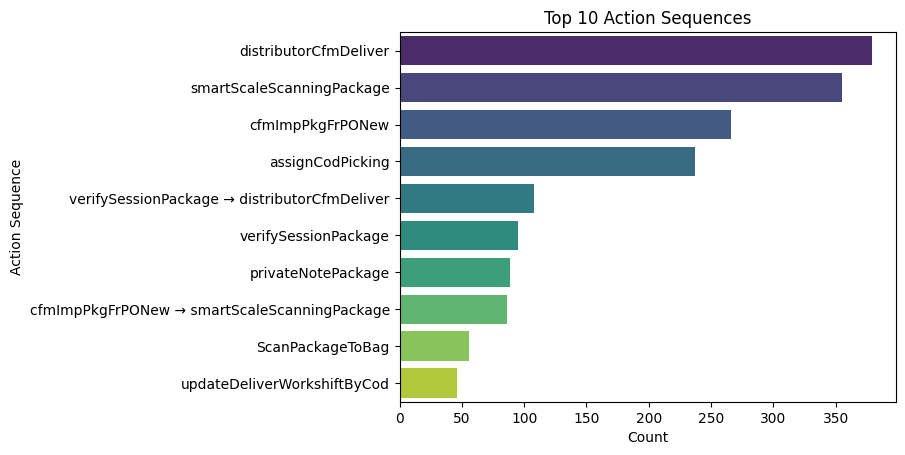

In [222]:
sns.barplot(data=sequence_counts_df.head(10), x='count', y='action_sequence', palette='viridis')
plt.title('Top 10 Action Sequences')
plt.xlabel('Count')
plt.ylabel('Action Sequence')

In [252]:
action_frequency(df_cleaned)

,action,count,percentage
0,distributorCfmDeliver,829,18.13
1,smartScaleScanningPackage,678,14.83
2,cfmImpPkgFrPONew,430,9.40
3,verifySessionPackage,361,7.89
4,assignCodPicking,289,6.32
...,...,...,...
64,DteamTakeAPhotoDeliver,1,0.02
65,ArriveDeliveringPoint,1,0.02
66,customerSigningDelivery,1,0.02
67,updateTmpDeliveringStatus,1,0.02


Nhận định:
1. Hành động distributorCfmDeliver có tần suất thực hiện cao nhất (trong tổng số 69 hành động), khoảng 18% so với tổng số hành động được thực hiện. Tiếp đó là hành động smartScaleScanningPackage cũng chiếm tần suất thực hiện khá cao, dao động khoảng 14%

2. cfmImpPkgFrPONew chiếm một nửa (khoảng 9%) so với distributorCfmDeliver.

3. Bên cạnh đó, một số hành động khác cũng được thực hiện nhưng với tần suất thấp hơn, như: verifySessionPackage, assignCodPicking, privateNotePackage, updateDeliverWorkshiftByCod, ...

4. Các hành động có tần suất thực hiện thấp phải kể đến là: exportBigSizePackages, ChangeDeliverCodByConfirmDeliveringByOperator, toPickCodByInstantDistribution, checkPackageBBS, importStationByDistributer, ...

In [ ]:
sequence_counts_df

,action_sequence,count
0,distributorCfmDeliver,379
1,smartScaleScanningPackage,355
2,cfmImpPkgFrPONew,266
3,assignCodPicking,237
4,verifySessionPackage → distributorCfmDeliver,108
...,...,...
282,assignCodPicking → PickupBill → confirmTmpPick...,1
283,confirmTmpPickedPackageStatus → PickupCrossPro...,1
284,printfPackage → printfPackage,1
285,confirmBigSizeQuantity → printfPackage → print...,1


In [224]:
df_cleaned['hour'] = df_cleaned['created'].dt.hour
df_cleaned['weekday'] = df_cleaned['created'].dt.dayofweek  # 0: Monday, 6: Sunday

C:\Users\yennt84\AppData\Local\Temp\ipykernel_9272\1687705854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['hour'] = df_cleaned['created'].dt.hour
C:\Users\yennt84\AppData\Local\Temp\ipykernel_9272\1687705854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['weekday'] = df_cleaned['created'].dt.dayofweek  # 0: Monday, 6: Sunday


In [225]:
df = df_cleaned.copy()

In [226]:
sequences_df = sequences_df.drop(columns=['action_sequence'])


In [227]:
sequences_df

,pkg_order,num_actions,unique_actions,action_diversity,action_sequence_str
0,1000273791,1,1,1.0,distributorCfmDeliver
1,1000465009,1,1,1.0,assignCodPicking
2,1000793270,3,3,1.0,changeAttributeForSurplus → privateNotePackage...
3,1001880050,1,1,1.0,distributorCfmDeliver
4,1002073549,1,1,1.0,smartScaleScanningPackage
...,...,...,...,...,...
2544,4010470315,3,3,1.0,verifySessionPackage → NVBCTakeAPhotoDelivery ...
2545,4010470367,2,2,1.0,NVBCTakeAPhotoDelivery → distributorCfmDeliver
2546,4010470399,1,1,1.0,distributorCfmDeliver
2547,4010470527,1,1,1.0,verifySessionPackage


In [228]:
sequence_shop_df = sequences_df.merge(
    df[['pkg_order', 'shop_id', 'shop_type_name', 'shop_status_name', 'shop__seniority', 
        'shop__categories', 'address__ward_name', 'address__district_name', 'address__province_name']],
    on='pkg_order', how='left'
).drop_duplicates()

Phân tích đặc điểm Shop

In [229]:
sequence_shop_df

,pkg_order,num_actions,unique_actions,action_diversity,action_sequence_str,shop_id,shop_type_name,shop_status_name,shop__seniority,shop__categories,address__ward_name,address__district_name,address__province_name
0,1000273791,1,1,1.0,distributorCfmDeliver,60695f5b-04d8-4d82-8ec7-4aca0a6e4c24,Pro (B2C),Đang làm việc,51,"[""fashion_new"",""houseware""]",NaN,Quận Từ Liêm,Hà Nội
1,1000465009,1,1,1.0,assignCodPicking,874c1a2b-1655-4afb-bf01-37453ea242d9,Pro (B2C),Đang làm việc,8,NaN,Phường Ngã Tư Sở,Quận Đống Đa,Hà Nội
2,1000793270,3,3,1.0,changeAttributeForSurplus → privateNotePackage...,465949a0-975e-4886-9391-b6169fc581ec,Pro (B2C),Đang làm việc,24,"[""accessories""]",Phường Hội Hợp,Thành phố Vĩnh Yên,Vĩnh Phúc
5,1001880050,1,1,1.0,distributorCfmDeliver,5db9220e-2c04-468d-be8e-45720a0a027f,Pro (B2C),Đang làm việc,68,"[""fashion_new""]",Phường An Hải Bắc,Quận Sơn Trà,Đà Nẵng
6,1002073549,1,1,1.0,smartScaleScanningPackage,620213bc-06cc-48d8-8db9-473a0a6e4d59,Standard (C2C),Đang làm việc,41,"[""accessories_new"",""stationery_new"",""elec_acce...",Phường Láng Hạ,Quận Đống Đa,Hà Nội
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4562,4010470315,3,3,1.0,verifySessionPackage → NVBCTakeAPhotoDelivery ...,67a58ef5-8954-48e1-b303-46650a6e4e65,Top Brand,Đang làm việc,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội
4565,4010470367,2,2,1.0,NVBCTakeAPhotoDelivery → distributorCfmDeliver,67a58ef5-8954-48e1-b303-46650a6e4e65,Top Brand,Đang làm việc,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội
4567,4010470399,1,1,1.0,distributorCfmDeliver,67a58ef5-8954-48e1-b303-46650a6e4e65,Top Brand,Đang làm việc,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội
4568,4010470527,1,1,1.0,verifySessionPackage,67a58ef5-8954-48e1-b303-46650a6e4e65,Top Brand,Đang làm việc,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội


In [230]:
sequence_shop_df["shop_type_name"].value_counts()

shop_type_name
Pro (B2C)                 1408
Standard (C2C)             932
Brand                       78
Top Brand                   77
Prime (Shopee, TikTok)      42
(B2B)                       12
Name: count, dtype: int64

In [231]:
932/2549

0.36563358179678307

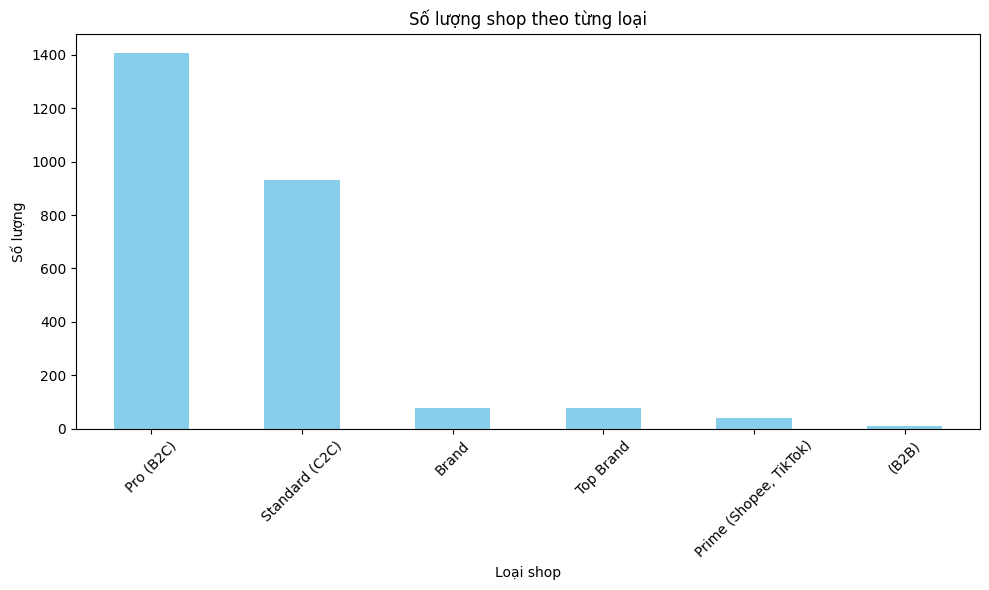

In [232]:
plt.figure(figsize=(10, 6))
sequence_shop_df["shop_type_name"].value_counts().plot(kind='bar', color='skyblue')

plt.title('Số lượng shop theo từng loại')
plt.xlabel('Loại shop')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nhận định:
1. Hầu hết các shop thuộc loại B2C, với tỉ lệ chiếm 55%.
2. Loại shop C2C cũng chiếm tỉ lệ khá ổn, khoảng 37% so với tất cả các shop.
3. Một số loại shop như Brand, Top Brand, Prime (Shopee, TikTok) và B2B chiếm tỉ lệ phần trăm rất thấp, chỉ khoảng 8%

In [233]:
sequence_shop_df["shop__seniority"].value_counts()

shop__seniority
8      147
4      109
1       81
12      65
3       58
      ... 
113      1
112      1
116      1
107      1
114      1
Name: count, Length: 117, dtype: int64

Nhận định:
1. Nhận thấy rằng số lượng thống kê thâm niên hoạt động của các shop theo tháng trải dài từ mới nhất (1 tháng) cho tới lâu nhất (141 tháng ~ 2 năm) đã cho thấy mức độ đa dạng về dữ liệu các shop được kiểm thử

Đề xuất:
1. Phân chia thâm niên shop theo các nhóm. Cụ thể như sau:

    a. Nhóm 1 - Mới với thâm niên <= 12 tháng hoạt động

    b. Nhóm 2 - Trung bình với thâm niên <= 36 tháng hoạt động 

    c. Nhóm 3 - Lâu năm với thâm niên > 36 tháng hoạt động 

In [234]:
seniority_df

,seniority_group,count
0,Nhóm 3 - Lâu năm,1274
1,Nhóm 1 - Mới,723
2,Nhóm 2 - Trung bình,552


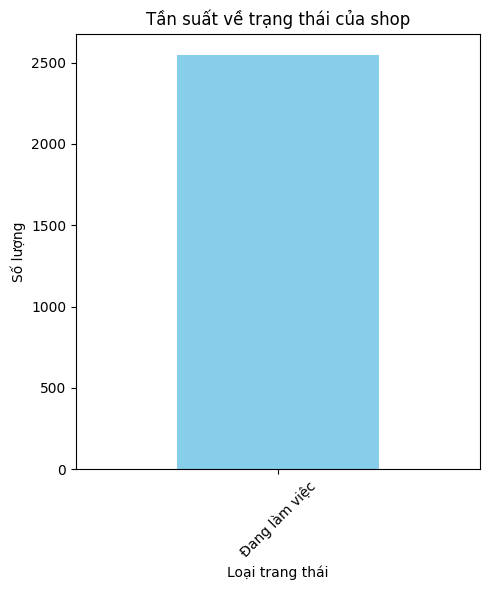

In [235]:
plt.figure(figsize=(5, 6))
sequence_shop_df["shop_status_name"].value_counts().plot(kind='bar', color='skyblue')

plt.title('Tần suất về trạng thái của shop')
plt.xlabel('Loại trang thái')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Phân chia thâm niên shop thành các nhóm

In [236]:
def map_seniority(months):
    if months <= 12:
        return 'Nhóm 1 - Mới'
    elif months <= 36:
        return 'Nhóm 2 - Trung bình'
    else:
        return 'Nhóm 3 - Lâu năm'

sequence_shop_df["seniority_group"] = sequence_shop_df["shop__seniority"].apply(map_seniority)


In [237]:
sequence_shop_df

,pkg_order,num_actions,unique_actions,action_diversity,action_sequence_str,shop_id,shop_type_name,shop_status_name,shop__seniority,shop__categories,address__ward_name,address__district_name,address__province_name,seniority_group
0,1000273791,1,1,1.0,distributorCfmDeliver,60695f5b-04d8-4d82-8ec7-4aca0a6e4c24,Pro (B2C),Đang làm việc,51,"[""fashion_new"",""houseware""]",NaN,Quận Từ Liêm,Hà Nội,Nhóm 3 - Lâu năm
1,1000465009,1,1,1.0,assignCodPicking,874c1a2b-1655-4afb-bf01-37453ea242d9,Pro (B2C),Đang làm việc,8,NaN,Phường Ngã Tư Sở,Quận Đống Đa,Hà Nội,Nhóm 1 - Mới
2,1000793270,3,3,1.0,changeAttributeForSurplus → privateNotePackage...,465949a0-975e-4886-9391-b6169fc581ec,Pro (B2C),Đang làm việc,24,"[""accessories""]",Phường Hội Hợp,Thành phố Vĩnh Yên,Vĩnh Phúc,Nhóm 2 - Trung bình
5,1001880050,1,1,1.0,distributorCfmDeliver,5db9220e-2c04-468d-be8e-45720a0a027f,Pro (B2C),Đang làm việc,68,"[""fashion_new""]",Phường An Hải Bắc,Quận Sơn Trà,Đà Nẵng,Nhóm 3 - Lâu năm
6,1002073549,1,1,1.0,smartScaleScanningPackage,620213bc-06cc-48d8-8db9-473a0a6e4d59,Standard (C2C),Đang làm việc,41,"[""accessories_new"",""stationery_new"",""elec_acce...",Phường Láng Hạ,Quận Đống Đa,Hà Nội,Nhóm 3 - Lâu năm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4562,4010470315,3,3,1.0,verifySessionPackage → NVBCTakeAPhotoDelivery ...,67a58ef5-8954-48e1-b303-46650a6e4e65,Top Brand,Đang làm việc,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Nhóm 1 - Mới
4565,4010470367,2,2,1.0,NVBCTakeAPhotoDelivery → distributorCfmDeliver,67a58ef5-8954-48e1-b303-46650a6e4e65,Top Brand,Đang làm việc,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Nhóm 1 - Mới
4567,4010470399,1,1,1.0,distributorCfmDeliver,67a58ef5-8954-48e1-b303-46650a6e4e65,Top Brand,Đang làm việc,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Nhóm 1 - Mới
4568,4010470527,1,1,1.0,verifySessionPackage,67a58ef5-8954-48e1-b303-46650a6e4e65,Top Brand,Đang làm việc,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Nhóm 1 - Mới


C:\Users\yennt84\AppData\Local\Temp\ipykernel_9272\296868372.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seniority_df, x="seniority_group", y="count", palette="Set2")


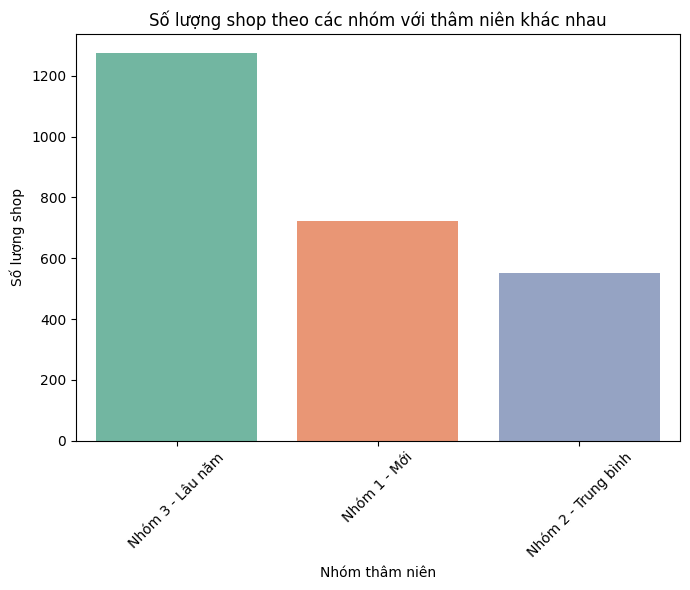

In [238]:
seniority_df = sequence_shop_df["seniority_group"].value_counts().reset_index()
seniority_df.columns = ["seniority_group", "count"]

plt.figure(figsize=(7, 6))
sns.barplot(data=seniority_df, x="seniority_group", y="count", palette="Set2")

plt.title("Số lượng shop theo các nhóm với thâm niên khác nhau")
plt.xlabel("Nhóm thâm niên")
plt.ylabel("Số lượng shop")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [239]:
sequence_shop_df["seniority_group"].value_counts()

seniority_group
Nhóm 3 - Lâu năm       1274
Nhóm 1 - Mới            723
Nhóm 2 - Trung bình     552
Name: count, dtype: int64

Nhận định:

1. Số lượng đơn hàng của các shop có thâm niên hoạt động từ 3 năm trở lên chiếm tỉ lệ phần trăm cao nhất, khoảng 50% (tức chiếm 1 nửa so với tổng số đơn hàng được kiểm định)

2. Số lượng đơn hàng đến từ các shop mới (dưới 1 năm thâm niên) bằng một nửa với so với nhóm 3 (trên 3 năm thâm niên) cho thấy các shop mới cũng có số lượng đơn hàng khá đáng kể

In [241]:
sequence_shop_df["shop__categories"].value_counts()

shop__categories
["fashion_new"]                                                                          435
["others"]                                                                               167
["fashion"]                                                                              160
["cosmetics"]                                                                             95
["accessories_new"]                                                                       84
                                                                                        ... 
["accessories","home_appliances","houseware","cosmetics","dry_food","stationery_new"]      1
["fragile","others"]                                                                       1
["accessories_new","home_appliances","elec_accessories","houseware"]                       1
["houseware","baby_mom","home_care"]                                                       1
["cosmetics","home_care","houseware","medicines","dry

In [242]:
sequence_shop_df

,pkg_order,num_actions,unique_actions,action_diversity,action_sequence_str,shop_id,shop_type_name,shop_status_name,shop__seniority,shop__categories,address__ward_name,address__district_name,address__province_name,seniority_group
0,1000273791,1,1,1.0,distributorCfmDeliver,60695f5b-04d8-4d82-8ec7-4aca0a6e4c24,Pro (B2C),Đang làm việc,51,"[""fashion_new"",""houseware""]",NaN,Quận Từ Liêm,Hà Nội,Nhóm 3 - Lâu năm
1,1000465009,1,1,1.0,assignCodPicking,874c1a2b-1655-4afb-bf01-37453ea242d9,Pro (B2C),Đang làm việc,8,NaN,Phường Ngã Tư Sở,Quận Đống Đa,Hà Nội,Nhóm 1 - Mới
2,1000793270,3,3,1.0,changeAttributeForSurplus → privateNotePackage...,465949a0-975e-4886-9391-b6169fc581ec,Pro (B2C),Đang làm việc,24,"[""accessories""]",Phường Hội Hợp,Thành phố Vĩnh Yên,Vĩnh Phúc,Nhóm 2 - Trung bình
5,1001880050,1,1,1.0,distributorCfmDeliver,5db9220e-2c04-468d-be8e-45720a0a027f,Pro (B2C),Đang làm việc,68,"[""fashion_new""]",Phường An Hải Bắc,Quận Sơn Trà,Đà Nẵng,Nhóm 3 - Lâu năm
6,1002073549,1,1,1.0,smartScaleScanningPackage,620213bc-06cc-48d8-8db9-473a0a6e4d59,Standard (C2C),Đang làm việc,41,"[""accessories_new"",""stationery_new"",""elec_acce...",Phường Láng Hạ,Quận Đống Đa,Hà Nội,Nhóm 3 - Lâu năm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4562,4010470315,3,3,1.0,verifySessionPackage → NVBCTakeAPhotoDelivery ...,67a58ef5-8954-48e1-b303-46650a6e4e65,Top Brand,Đang làm việc,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Nhóm 1 - Mới
4565,4010470367,2,2,1.0,NVBCTakeAPhotoDelivery → distributorCfmDeliver,67a58ef5-8954-48e1-b303-46650a6e4e65,Top Brand,Đang làm việc,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Nhóm 1 - Mới
4567,4010470399,1,1,1.0,distributorCfmDeliver,67a58ef5-8954-48e1-b303-46650a6e4e65,Top Brand,Đang làm việc,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Nhóm 1 - Mới
4568,4010470527,1,1,1.0,verifySessionPackage,67a58ef5-8954-48e1-b303-46650a6e4e65,Top Brand,Đang làm việc,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Nhóm 1 - Mới


Đếm số lần xuất hiện của từng chuỗi trong từng loại shop_type_name

In [243]:
def top_sequences_by_shop_type(sequence_shop_df, top_n=3):
    group_counts = sequence_shop_df.groupby(['shop_type_name', 'action_sequence_str']) \
                                   .size().reset_index(name='count')
    
    # Lấy top N chuỗi phổ biến nhất mỗi nhóm shop_type_name
    top_sequences = group_counts.sort_values(['shop_type_name', 'count'], ascending=[True, False]) \
                                .groupby('shop_type_name').head(top_n).reset_index(drop=True)
    
    return top_sequences


In [245]:
top_sequences_df = top_sequences_by_shop_type(sequence_shop_df, top_n=5)
top_sequences_df

,shop_type_name,action_sequence_str,count
0,(B2B),distributorCfmDeliver,4
1,(B2B),smartScaleScanningPackage,2
2,(B2B),ScanPackageToBag,1
3,(B2B),printfPackage → saveIsfrageImages → distributo...,1
4,(B2B),privateNotePackage → changeAttributeForSurplus,1
5,Brand,ScanPackageToBag,10
6,Brand,distributorCfmDeliver,8
7,Brand,verifySessionPackage,6
8,Brand,assignCodPicking,5
9,Brand,privateNotePackage,5


In [254]:
sequences_df_filtered = sequences_df[sequences_df['num_actions'] >= 2]

In [256]:
sequences_df_filtered["action_sequence_str"].value_counts()

action_sequence_str
verifySessionPackage → distributorCfmDeliver                                                                                             108
cfmImpPkgFrPONew → smartScaleScanningPackage                                                                                              86
verifySessionPackage → updateDeliverWorkshiftByCod → distributorCfmDeliver                                                                42
smartScaleScanningPackage → smartScaleScanningPackage                                                                                     31
updateDeliverWorkshiftByCod → distributorCfmDeliver                                                                                       26
                                                                                                                                        ... 
privateNotePackage → verifySessionPackage                                                                                             

Nhận định:
1. Trong tổng số 276 chuỗi hành động, verifySessionPackage → distributorCfmDeliver chiếm tần suất cao nhất (108 lần) => đây là chuỗi với nghiệp vụ là 


UPDATE 14/06

In [1]:
import json
import pandas as pd

In [3]:
df = pd.read_csv("c:/Users/yennt84/Downloads/My Notebook (9).csv")

In [4]:
df

,created_order,pkg_order,action,desc,created,created_user_id,shop_id,shop_code,shop_type
0,2025-06-04 14:58:36,1793158554,NVBCTakeAPhotoDelivery,Đã chụp ảnh xuất giao/ đã chụp ảnh xuất giao đ...,2025-06-10 07:32:41,800841,50ff081d-d29b-447c-b87f-3aad69ae3f60,S22555614,1
1,2025-06-04 14:58:36,1793158554,privateNotePackage,Phiên kiểm VS2669268: Xác nhận có hàng tại kho...,2025-06-10 07:31:20,800841,50ff081d-d29b-447c-b87f-3aad69ae3f60,S22555614,1
2,2025-06-04 14:58:36,1793158554,updateDeliverWorkshiftByCod,Thay đổi ca hẹn giao từ sáng ngày 06-06-2025 s...,2025-06-10 07:31:24,800841,50ff081d-d29b-447c-b87f-3aad69ae3f60,S22555614,1
3,2025-06-04 14:58:36,1793158554,distributorCfmDeliver,Xác nhận giao hàng cho COD: samnx - NGUYỄN XUÂ...,2025-06-10 07:33:25,800841,50ff081d-d29b-447c-b87f-3aad69ae3f60,S22555614,1
4,2025-06-04 10:34:11,1233360970,distributorCfmDeliver,Xác nhận giao hàng cho COD: bienlm1 - LÊ MINH ...,2025-06-09 09:51:19,800887,60ee7c7e-d0c4-4375-badd-4d9e0a6e4d53,S19824800,0
...,...,...,...,...,...,...,...,...,...
6406,2025-06-03 13:31:31,1418870575,assignCodPicking,Xác nhận cod NGUYỄN ANH TUẤN đi lấy hàng,2025-06-12 16:31:24,801070,5e08ca84-9d8a-4427-9116-cbe0f8b1d338,S22801077,1
6407,2025-06-03 17:56:11,1071373669,smartScaleScanningPackage,"Quét qua trụ: kích thước 330x206x123, cân nặng...",2025-06-11 19:21:36,800943,6059a390-13bc-4e78-9cb5-477e0a784c66,S19001323,1
6408,2025-06-03 13:04:12,1297395856,verifySessionPackage,Xác nhận có hàng tại phiên kiểm kho 821495,2025-06-11 12:46:45,801064,603f909c-1774-4767-a377-43770a6e4c25,S18842848,0
6409,2025-06-03 13:00:38,1258182988,distributorCfmDeliver,Xác nhận giao hàng cho COD: quandh93 - ĐỖ HỒNG...,2025-06-14 08:00:02,800887,608e20f7-97f4-42dc-9ce2-4aab0a784c67,S19247217,1


In [5]:
with open("shop_final.json", "r", encoding="utf-8") as f:
    json_data = json.load(f)

In [6]:
records = json_data

In [7]:
df_shop = pd.DataFrame(records)

In [9]:
df_shop

,shop_id,shop_order,shop_name,shop_status_name,shop_type_name,shop__created,shop__seniority,shop__categories,address__province_name,address__address_name,address__ward_name,address__district_name
0,a37ca206-720f-4220-8287-3ed01dca4f36,22901156,GIA DỤNG NHẬP KHẨU,Đang làm việc,Pro (B2C),2025-04-11 09:37:13,2,,Hà Nội,Phường Xuân La,Phường Xuân La,Quận Tây Hồ
1,607b978a-3560-486a-9fbc-4ae40a784c67,19169494,Chussi Korea,Đang làm việc,Pro (B2C),2021-04-18 09:20:58,51,"[""fashion_new""]",Hà Nội,Phường Xuân Tảo,Phường Xuân Tảo,Quận Từ Liêm
2,5daa7371-6dd0-47a4-9e0d-4fe00a0a028f,8554387,Trong Hàng VNXK,Đang làm việc,Pro (B2C),2019-10-19 09:22:41,69,"[""fashion_new""]",TP Hồ Chí Minh,Quận 9,None,Quận 9
3,5e4893be-2bf4-4593-8eef-1b4a0a0a027f,10655990,Kho hàng 03,Đang làm việc,Pro (B2C),2020-02-16 07:58:38,65,"[""cosmetics""]",Trà Vinh,Xã Long Khánh,Xã Long Khánh,Huyện Duyên Hải
4,67c5550a-a320-4b22-af7f-499d0a6e4d74,22869972,Shop Toàn Thịnh.,Đang làm việc,Pro (B2C),2025-03-03 14:06:50,3,None,Hà Nam,Xã Văn Xá,Xã Văn Xá,Huyện Kim Bảng
...,...,...,...,...,...,...,...,...,...,...,...,...
1503,6513b771-a2b0-4f17-8287-4f530a6e4d76,22344280,TP Fashion,Đang làm việc,Pro (B2C),2023-09-27 12:02:41,21,"[""fashion_new""]",Tiền Giang,Xã An Thạnh Thủy,Xã An Thạnh Thủy,Huyện Chợ Gạo
1504,660d039d-2a48-45d7-930d-40540a6e4c3c,22561636,Chuyên đồ bộ Danh,Đang làm việc,Pro (B2C),2024-04-03 14:22:05,15,"[""fashion_new""]",TP Hồ Chí Minh,Phường 8,Phường 8,Quận Gò Vấp
1505,632c25a6-f078-4b51-a9c2-48b20a6e4e64,21813573,Unie-Kalite-Hasuta,Đang làm việc,Brand,2022-09-22 16:06:46,33,None,Hà Nội,Phường Biên Giang,Phường Biên Giang,Quận Hà Đông
1506,61d3a32a-33b7-4ec0-b5c9-a2e99806083d,22873123,TỔNG KHO GIÁ TỐT,Đang làm việc,Pro (B2C),2025-03-06 15:47:15,3,,Hà Nội,phường Phú Diễn,phường Phú Diễn,Quận Từ Liêm


In [12]:
df_merge = df.merge(df_shop, on='shop_id', how='left')

In [13]:
df_merge

,created_order,pkg_order,action,desc,created,created_user_id,shop_id,shop_code,shop_type,shop_order,shop_name,shop_status_name,shop_type_name,shop__created,shop__seniority,shop__categories,address__province_name,address__address_name,address__ward_name,address__district_name
0,2025-06-04 14:58:36,1793158554,NVBCTakeAPhotoDelivery,Đã chụp ảnh xuất giao/ đã chụp ảnh xuất giao đ...,2025-06-10 07:32:41,800841,50ff081d-d29b-447c-b87f-3aad69ae3f60,S22555614,1,22555614,SANG HÒA ĐÈN NLMT,Đang làm việc,Pro (B2C),2024-03-28 13:40:10,15,"[""accessories_new"",""elec_accessories"",""others""]",TP Hồ Chí Minh,Phường An Phú Đông,Phường An Phú Đông,Quận 12
1,2025-06-04 14:58:36,1793158554,privateNotePackage,Phiên kiểm VS2669268: Xác nhận có hàng tại kho...,2025-06-10 07:31:20,800841,50ff081d-d29b-447c-b87f-3aad69ae3f60,S22555614,1,22555614,SANG HÒA ĐÈN NLMT,Đang làm việc,Pro (B2C),2024-03-28 13:40:10,15,"[""accessories_new"",""elec_accessories"",""others""]",TP Hồ Chí Minh,Phường An Phú Đông,Phường An Phú Đông,Quận 12
2,2025-06-04 14:58:36,1793158554,updateDeliverWorkshiftByCod,Thay đổi ca hẹn giao từ sáng ngày 06-06-2025 s...,2025-06-10 07:31:24,800841,50ff081d-d29b-447c-b87f-3aad69ae3f60,S22555614,1,22555614,SANG HÒA ĐÈN NLMT,Đang làm việc,Pro (B2C),2024-03-28 13:40:10,15,"[""accessories_new"",""elec_accessories"",""others""]",TP Hồ Chí Minh,Phường An Phú Đông,Phường An Phú Đông,Quận 12
3,2025-06-04 14:58:36,1793158554,distributorCfmDeliver,Xác nhận giao hàng cho COD: samnx - NGUYỄN XUÂ...,2025-06-10 07:33:25,800841,50ff081d-d29b-447c-b87f-3aad69ae3f60,S22555614,1,22555614,SANG HÒA ĐÈN NLMT,Đang làm việc,Pro (B2C),2024-03-28 13:40:10,15,"[""accessories_new"",""elec_accessories"",""others""]",TP Hồ Chí Minh,Phường An Phú Đông,Phường An Phú Đông,Quận 12
4,2025-06-04 10:34:11,1233360970,distributorCfmDeliver,Xác nhận giao hàng cho COD: bienlm1 - LÊ MINH ...,2025-06-09 09:51:19,800887,60ee7c7e-d0c4-4375-badd-4d9e0a6e4d53,S19824800,0,19824800,Ngọc Thảo,Đang làm việc,Standard (C2C),2021-07-14 12:56:14,48,"[""cosmetics"",""accessories""]",Lâm Đồng,Phường 1,Phường 1,Thành phố Bảo Lộc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6406,2025-06-03 13:31:31,1418870575,assignCodPicking,Xác nhận cod NGUYỄN ANH TUẤN đi lấy hàng,2025-06-12 16:31:24,801070,5e08ca84-9d8a-4427-9116-cbe0f8b1d338,S22801077,1,22801077,Bychan.studio,Đang làm việc,Pro (B2C),2024-12-14 02:40:26,6,"[""fashion_new""]",Hà Nội,Phường Nhân Chính,Phường Nhân Chính,Quận Thanh Xuân
6407,2025-06-03 17:56:11,1071373669,smartScaleScanningPackage,"Quét qua trụ: kích thước 330x206x123, cân nặng...",2025-06-11 19:21:36,800943,6059a390-13bc-4e78-9cb5-477e0a784c66,S19001323,1,19001323,HP,Đang làm việc,Pro (B2C),2021-03-23 15:15:12,51,"[""others""]",Hà Nội,Phường Vĩnh Tuy,Phường Vĩnh Tuy,Quận Hai Bà Trưng
6408,2025-06-03 13:04:12,1297395856,verifySessionPackage,Xác nhận có hàng tại phiên kiểm kho 821495,2025-06-11 12:46:45,801064,603f909c-1774-4767-a377-43770a6e4c25,S18842848,0,18842848,Phạm Thanh Tuyền,Đang làm việc,Standard (C2C),2021-03-03 20:35:24,52,"[""accessories"",""others""]",TP Hồ Chí Minh,Phường Bình Trị Đông B,Phường Bình Trị Đông B,Quận Bình Tân
6409,2025-06-03 13:00:38,1258182988,distributorCfmDeliver,Xác nhận giao hàng cho COD: quandh93 - ĐỖ HỒNG...,2025-06-14 08:00:02,800887,608e20f7-97f4-42dc-9ce2-4aab0a784c67,S19247217,1,19247217,uyenphuong,Đang làm việc,Pro (B2C),2021-05-02 10:48:07,50,"[""accessories"",""fashion_new""]",Thành phố Huế,Phường Hương Sơ,Phường Hương Sơ,Quận Phú Xuân


In [ ]:
#df_merge.to_csv("C:/Users/yennt84/Documents/GitHub/automation_action/df_final.csv", index=False)

In [16]:
df = pd.read_csv("df_final.csv")

In [17]:
df

,created_order,pkg_order,action,desc,created,created_user_id,shop_id,shop_code,shop_type,shop_order,shop_name,shop_status_name,shop_type_name,shop__created,shop__seniority,shop__categories,address__province_name,address__address_name,address__ward_name,address__district_name
0,2025-06-04 14:58:36,1793158554,NVBCTakeAPhotoDelivery,Đã chụp ảnh xuất giao/ đã chụp ảnh xuất giao đ...,2025-06-10 07:32:41,800841,50ff081d-d29b-447c-b87f-3aad69ae3f60,S22555614,1,22555614,SANG HÒA ĐÈN NLMT,Đang làm việc,Pro (B2C),2024-03-28 13:40:10,15,"[""accessories_new"",""elec_accessories"",""others""]",TP Hồ Chí Minh,Phường An Phú Đông,Phường An Phú Đông,Quận 12
1,2025-06-04 14:58:36,1793158554,privateNotePackage,Phiên kiểm VS2669268: Xác nhận có hàng tại kho...,2025-06-10 07:31:20,800841,50ff081d-d29b-447c-b87f-3aad69ae3f60,S22555614,1,22555614,SANG HÒA ĐÈN NLMT,Đang làm việc,Pro (B2C),2024-03-28 13:40:10,15,"[""accessories_new"",""elec_accessories"",""others""]",TP Hồ Chí Minh,Phường An Phú Đông,Phường An Phú Đông,Quận 12
2,2025-06-04 14:58:36,1793158554,updateDeliverWorkshiftByCod,Thay đổi ca hẹn giao từ sáng ngày 06-06-2025 s...,2025-06-10 07:31:24,800841,50ff081d-d29b-447c-b87f-3aad69ae3f60,S22555614,1,22555614,SANG HÒA ĐÈN NLMT,Đang làm việc,Pro (B2C),2024-03-28 13:40:10,15,"[""accessories_new"",""elec_accessories"",""others""]",TP Hồ Chí Minh,Phường An Phú Đông,Phường An Phú Đông,Quận 12
3,2025-06-04 14:58:36,1793158554,distributorCfmDeliver,Xác nhận giao hàng cho COD: samnx - NGUYỄN XUÂ...,2025-06-10 07:33:25,800841,50ff081d-d29b-447c-b87f-3aad69ae3f60,S22555614,1,22555614,SANG HÒA ĐÈN NLMT,Đang làm việc,Pro (B2C),2024-03-28 13:40:10,15,"[""accessories_new"",""elec_accessories"",""others""]",TP Hồ Chí Minh,Phường An Phú Đông,Phường An Phú Đông,Quận 12
4,2025-06-04 10:34:11,1233360970,distributorCfmDeliver,Xác nhận giao hàng cho COD: bienlm1 - LÊ MINH ...,2025-06-09 09:51:19,800887,60ee7c7e-d0c4-4375-badd-4d9e0a6e4d53,S19824800,0,19824800,Ngọc Thảo,Đang làm việc,Standard (C2C),2021-07-14 12:56:14,48,"[""cosmetics"",""accessories""]",Lâm Đồng,Phường 1,Phường 1,Thành phố Bảo Lộc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6406,2025-06-03 13:31:31,1418870575,assignCodPicking,Xác nhận cod NGUYỄN ANH TUẤN đi lấy hàng,2025-06-12 16:31:24,801070,5e08ca84-9d8a-4427-9116-cbe0f8b1d338,S22801077,1,22801077,Bychan.studio,Đang làm việc,Pro (B2C),2024-12-14 02:40:26,6,"[""fashion_new""]",Hà Nội,Phường Nhân Chính,Phường Nhân Chính,Quận Thanh Xuân
6407,2025-06-03 17:56:11,1071373669,smartScaleScanningPackage,"Quét qua trụ: kích thước 330x206x123, cân nặng...",2025-06-11 19:21:36,800943,6059a390-13bc-4e78-9cb5-477e0a784c66,S19001323,1,19001323,HP,Đang làm việc,Pro (B2C),2021-03-23 15:15:12,51,"[""others""]",Hà Nội,Phường Vĩnh Tuy,Phường Vĩnh Tuy,Quận Hai Bà Trưng
6408,2025-06-03 13:04:12,1297395856,verifySessionPackage,Xác nhận có hàng tại phiên kiểm kho 821495,2025-06-11 12:46:45,801064,603f909c-1774-4767-a377-43770a6e4c25,S18842848,0,18842848,Phạm Thanh Tuyền,Đang làm việc,Standard (C2C),2021-03-03 20:35:24,52,"[""accessories"",""others""]",TP Hồ Chí Minh,Phường Bình Trị Đông B,Phường Bình Trị Đông B,Quận Bình Tân
6409,2025-06-03 13:00:38,1258182988,distributorCfmDeliver,Xác nhận giao hàng cho COD: quandh93 - ĐỖ HỒNG...,2025-06-14 08:00:02,800887,608e20f7-97f4-42dc-9ce2-4aab0a784c67,S19247217,1,19247217,uyenphuong,Đang làm việc,Pro (B2C),2021-05-02 10:48:07,50,"[""accessories"",""fashion_new""]",Thành phố Huế,Phường Hương Sơ,Phường Hương Sơ,Quận Phú Xuân


In [18]:
df = df.sort_values(["pkg_order", "created"], ascending = [True, True])

In [19]:
df

,created_order,pkg_order,action,desc,created,created_user_id,shop_id,shop_code,shop_type,shop_order,shop_name,shop_status_name,shop_type_name,shop__created,shop__seniority,shop__categories,address__province_name,address__address_name,address__ward_name,address__district_name
1055,2025-06-04 16:57:39,1000495161,distributorCfmDeliver,Xác nhận giao hàng cho COD: daint41 - NGUYỄN T...,2025-06-09 08:14:15,800823,6809ae0a-79ac-4e26-95a3-43ad0a6e4cd3,S22910529,1,22910529,Công ty MEGA TECH,Đang làm việc,Pro (B2C),2025-04-24 10:20:42,2,NaN,Hà Nội,Phường Hạ Đình,Phường Hạ Đình,Quận Thanh Xuân
1065,2025-06-04 16:57:39,1000495161,confirmTmpDeliveredPackageStatus,từ <b>Đã điều phối giao hàng/Đang giao hàng</b...,2025-06-09 15:25:31,800823,6809ae0a-79ac-4e26-95a3-43ad0a6e4cd3,S22910529,1,22910529,Công ty MEGA TECH,Đang làm việc,Pro (B2C),2025-04-24 10:20:42,2,NaN,Hà Nội,Phường Hạ Đình,Phường Hạ Đình,Quận Thanh Xuân
1067,2025-06-04 16:57:39,1000495161,updateDelayDeliveringByCod,Cập nhật delay giao hàng bởi COD,2025-06-09 15:25:31,800823,6809ae0a-79ac-4e26-95a3-43ad0a6e4cd3,S22910529,1,22910529,Công ty MEGA TECH,Đang làm việc,Pro (B2C),2025-04-24 10:20:42,2,NaN,Hà Nội,Phường Hạ Đình,Phường Hạ Đình,Quận Thanh Xuân
1066,2025-06-04 16:57:39,1000495161,RefundBill,Hóa đơn thu tiền <b>BTT2148818337.T611031.0906...,2025-06-09 15:25:32,800823,6809ae0a-79ac-4e26-95a3-43ad0a6e4cd3,S22910529,1,22910529,Công ty MEGA TECH,Đang làm việc,Pro (B2C),2025-04-24 10:20:42,2,NaN,Hà Nội,Phường Hạ Đình,Phường Hạ Đình,Quận Thanh Xuân
1064,2025-06-04 16:57:39,1000495161,distributorCfmDeliver,Xác nhận giao hàng cho COD: daint41 - NGUYỄN T...,2025-06-11 08:02:07,800823,6809ae0a-79ac-4e26-95a3-43ad0a6e4cd3,S22910529,1,22910529,Công ty MEGA TECH,Đang làm việc,Pro (B2C),2025-04-24 10:20:42,2,NaN,Hà Nội,Phường Hạ Đình,Phường Hạ Đình,Quận Thanh Xuân
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,2025-06-04 08:31:31,4010456664,confirmTmpDeliveredPackageStatus,từ <b>Đã điều phối giao hàng/Đang giao hàng</b...,2025-06-09 17:31:18,800822,b3fcc7e6-a271-4cd6-8e72-6f89a883ad91,S22696036,1,22696036,VINAMILK.VN - BOXME,Đang làm việc,Top Brand,2024-08-22 10:56:15,10,NaN,Hà Nội,Phường Minh Khai,Phường Minh Khai,Quận Hai Bà Trưng
1028,2025-06-04 08:31:31,4010456664,RefundBill,Hóa đơn thu tiền <b>BTT2148853760.T599246.0906...,2025-06-09 17:31:19,800822,b3fcc7e6-a271-4cd6-8e72-6f89a883ad91,S22696036,1,22696036,VINAMILK.VN - BOXME,Đang làm việc,Top Brand,2024-08-22 10:56:15,10,NaN,Hà Nội,Phường Minh Khai,Phường Minh Khai,Quận Hai Bà Trưng
1032,2025-06-04 08:31:31,4010456664,saveIsfrageImages,Đã chụp ảnh gia cố hàng <br/>,2025-06-09 17:31:48,800822,b3fcc7e6-a271-4cd6-8e72-6f89a883ad91,S22696036,1,22696036,VINAMILK.VN - BOXME,Đang làm việc,Top Brand,2024-08-22 10:56:15,10,NaN,Hà Nội,Phường Minh Khai,Phường Minh Khai,Quận Hai Bà Trưng
1040,2025-06-04 08:31:31,4010456664,updateDeliverWorkshiftByCod,Thay đổi ca hẹn giao từ chiều ngày 10-06-2025 ...,2025-06-10 08:42:09,800822,b3fcc7e6-a271-4cd6-8e72-6f89a883ad91,S22696036,1,22696036,VINAMILK.VN - BOXME,Đang làm việc,Top Brand,2024-08-22 10:56:15,10,NaN,Hà Nội,Phường Minh Khai,Phường Minh Khai,Quận Hai Bà Trưng


1. Tiền xử lý dữ liệu

In [20]:
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Preprocess the DataFrame to ensure it has the required structure and data types.
    """
    # Ensure 'created' is in datetime format
    df['created'] = pd.to_datetime(df['created'], errors='coerce')
    missing_summary = df.isnull().sum()
    df = df.drop_duplicates(keep='first')
    
    return df

In [21]:
preprocess_data(df)

,created_order,pkg_order,action,desc,created,created_user_id,shop_id,shop_code,shop_type,shop_order,shop_name,shop_status_name,shop_type_name,shop__created,shop__seniority,shop__categories,address__province_name,address__address_name,address__ward_name,address__district_name
1055,2025-06-04 16:57:39,1000495161,distributorCfmDeliver,Xác nhận giao hàng cho COD: daint41 - NGUYỄN T...,2025-06-09 08:14:15,800823,6809ae0a-79ac-4e26-95a3-43ad0a6e4cd3,S22910529,1,22910529,Công ty MEGA TECH,Đang làm việc,Pro (B2C),2025-04-24 10:20:42,2,NaN,Hà Nội,Phường Hạ Đình,Phường Hạ Đình,Quận Thanh Xuân
1065,2025-06-04 16:57:39,1000495161,confirmTmpDeliveredPackageStatus,từ <b>Đã điều phối giao hàng/Đang giao hàng</b...,2025-06-09 15:25:31,800823,6809ae0a-79ac-4e26-95a3-43ad0a6e4cd3,S22910529,1,22910529,Công ty MEGA TECH,Đang làm việc,Pro (B2C),2025-04-24 10:20:42,2,NaN,Hà Nội,Phường Hạ Đình,Phường Hạ Đình,Quận Thanh Xuân
1067,2025-06-04 16:57:39,1000495161,updateDelayDeliveringByCod,Cập nhật delay giao hàng bởi COD,2025-06-09 15:25:31,800823,6809ae0a-79ac-4e26-95a3-43ad0a6e4cd3,S22910529,1,22910529,Công ty MEGA TECH,Đang làm việc,Pro (B2C),2025-04-24 10:20:42,2,NaN,Hà Nội,Phường Hạ Đình,Phường Hạ Đình,Quận Thanh Xuân
1066,2025-06-04 16:57:39,1000495161,RefundBill,Hóa đơn thu tiền <b>BTT2148818337.T611031.0906...,2025-06-09 15:25:32,800823,6809ae0a-79ac-4e26-95a3-43ad0a6e4cd3,S22910529,1,22910529,Công ty MEGA TECH,Đang làm việc,Pro (B2C),2025-04-24 10:20:42,2,NaN,Hà Nội,Phường Hạ Đình,Phường Hạ Đình,Quận Thanh Xuân
1064,2025-06-04 16:57:39,1000495161,distributorCfmDeliver,Xác nhận giao hàng cho COD: daint41 - NGUYỄN T...,2025-06-11 08:02:07,800823,6809ae0a-79ac-4e26-95a3-43ad0a6e4cd3,S22910529,1,22910529,Công ty MEGA TECH,Đang làm việc,Pro (B2C),2025-04-24 10:20:42,2,NaN,Hà Nội,Phường Hạ Đình,Phường Hạ Đình,Quận Thanh Xuân
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,2025-06-04 08:31:31,4010456664,confirmTmpDeliveredPackageStatus,từ <b>Đã điều phối giao hàng/Đang giao hàng</b...,2025-06-09 17:31:18,800822,b3fcc7e6-a271-4cd6-8e72-6f89a883ad91,S22696036,1,22696036,VINAMILK.VN - BOXME,Đang làm việc,Top Brand,2024-08-22 10:56:15,10,NaN,Hà Nội,Phường Minh Khai,Phường Minh Khai,Quận Hai Bà Trưng
1028,2025-06-04 08:31:31,4010456664,RefundBill,Hóa đơn thu tiền <b>BTT2148853760.T599246.0906...,2025-06-09 17:31:19,800822,b3fcc7e6-a271-4cd6-8e72-6f89a883ad91,S22696036,1,22696036,VINAMILK.VN - BOXME,Đang làm việc,Top Brand,2024-08-22 10:56:15,10,NaN,Hà Nội,Phường Minh Khai,Phường Minh Khai,Quận Hai Bà Trưng
1032,2025-06-04 08:31:31,4010456664,saveIsfrageImages,Đã chụp ảnh gia cố hàng <br/>,2025-06-09 17:31:48,800822,b3fcc7e6-a271-4cd6-8e72-6f89a883ad91,S22696036,1,22696036,VINAMILK.VN - BOXME,Đang làm việc,Top Brand,2024-08-22 10:56:15,10,NaN,Hà Nội,Phường Minh Khai,Phường Minh Khai,Quận Hai Bà Trưng
1040,2025-06-04 08:31:31,4010456664,updateDeliverWorkshiftByCod,Thay đổi ca hẹn giao từ chiều ngày 10-06-2025 ...,2025-06-10 08:42:09,800822,b3fcc7e6-a271-4cd6-8e72-6f89a883ad91,S22696036,1,22696036,VINAMILK.VN - BOXME,Đang làm việc,Top Brand,2024-08-22 10:56:15,10,NaN,Hà Nội,Phường Minh Khai,Phường Minh Khai,Quận Hai Bà Trưng


In [22]:
df_cleaned = preprocess_data(df)

2. Thống kê tần suất từng hành động 

In [23]:
def action_frequency(df_cleaned):
    freq = df_cleaned['action'].value_counts().reset_index()
    freq.columns = ['action', 'count']
    freq['percentage'] = round (((freq['count'] / freq['count'].sum()) * 100), 2)
    return freq 

3. Thống kê tần suất chuỗi hành động theo đơn hàng

In [25]:
def action_sequence_stats(df_cleaned):
    df_cleaned = df_cleaned.sort_values(by=['pkg_order', 'created'])

    sequences = df_cleaned.groupby('pkg_order').agg(
        action_sequence=('action', list),
        num_actions=('action', lambda x: len(x)),
        unique_actions=('action', lambda x: len(set(x))),
        action_diversity=('action', lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)
    ).reset_index()

    sequences['action_sequence_str'] = sequences['action_sequence'].apply(lambda x: ' → '.join(x))

    sequence_counts = sequences['action_sequence_str'].value_counts().reset_index()
    sequence_counts.columns = ['action_sequence', 'count']

    return sequences, sequence_counts


In [26]:
sequences_df, sequence_counts_df = action_sequence_stats(df_cleaned)

In [27]:
sequences_df

,pkg_order,action_sequence,num_actions,unique_actions,action_diversity,action_sequence_str
0,1000495161,"[distributorCfmDeliver, confirmTmpDeliveredPac...",13,6,0.461538,distributorCfmDeliver → confirmTmpDeliveredPac...
1,1000954392,[distributorCfmDeliver],1,1,1.000000,distributorCfmDeliver
2,1001041791,"[verifySessionPackage, distributorCfmDeliver, ...",6,2,0.333333,verifySessionPackage → distributorCfmDeliver →...
3,1001385328,[distributorCfmDeliver],1,1,1.000000,distributorCfmDeliver
4,1001614734,"[privateNotePackage, putPackages2Bag, smartSca...",4,4,1.000000,privateNotePackage → putPackages2Bag → smartSc...
...,...,...,...,...,...,...
2607,4010454385,"[distributorCfmDeliver, confirmTmpDeliveredPac...",5,4,0.800000,distributorCfmDeliver → confirmTmpDeliveredPac...
2608,4010454527,"[updateDeliverWorkshiftByCod, NVBCConfirmImage...",11,6,0.545455,updateDeliverWorkshiftByCod → NVBCConfirmImage...
2609,4010454968,"[verifySessionPackage, verifySessionPackage, v...",3,1,0.333333,verifySessionPackage → verifySessionPackage → ...
2610,4010455063,"[putPackages2Bag, putInBox]",2,2,1.000000,putPackages2Bag → putInBox


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\yennt84\AppData\Local\Temp\ipykernel_9984\2436548293.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sequence_counts_df.head(10), x='count', y='action_sequence', palette='viridis')


Text(0, 0.5, 'Action Sequence')

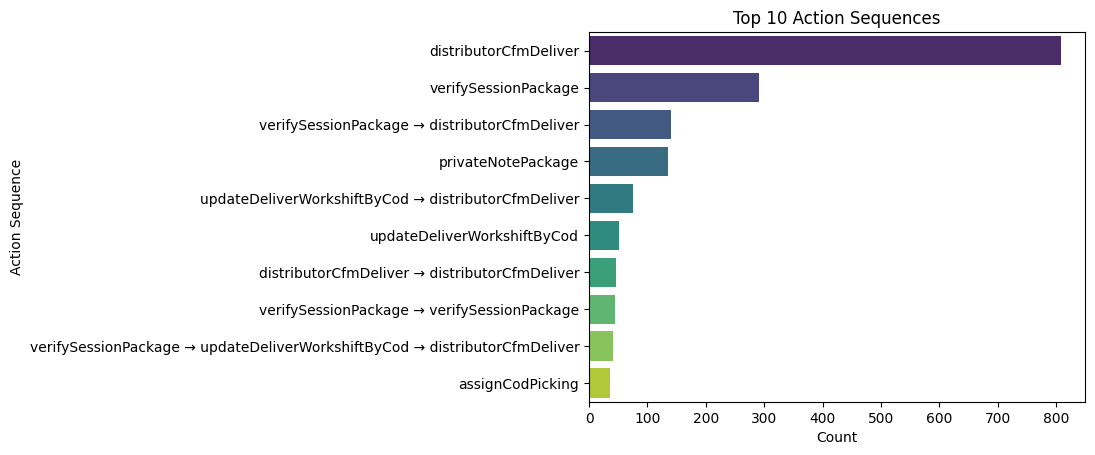

In [29]:
sns.barplot(data=sequence_counts_df.head(10), x='count', y='action_sequence', palette='viridis')
plt.title('Top 10 Action Sequences')
plt.xlabel('Count')
plt.ylabel('Action Sequence')

In [30]:
action_frequency(df_cleaned)

,action,count,percentage
0,distributorCfmDeliver,2098,32.75
1,verifySessionPackage,1277,19.93
2,privateNotePackage,437,6.82
3,updateDeliverWorkshiftByCod,418,6.52
4,RefundBill,281,4.39
...,...,...,...
70,TakeAPhotoPicked,1,0.02
71,updatePartDeliveredByCod,1,0.02
72,printPackageBBS,1,0.02
73,ArriveDeliveringPoint,1,0.02


In [67]:
x = action_frequency(df_cleaned)
x

,action,count,percentage
0,distributorCfmDeliver,2098,32.75
1,verifySessionPackage,1277,19.93
2,privateNotePackage,437,6.82
3,updateDeliverWorkshiftByCod,418,6.52
4,RefundBill,281,4.39
...,...,...,...
70,TakeAPhotoPicked,1,0.02
71,updatePartDeliveredByCod,1,0.02
72,printPackageBBS,1,0.02
73,ArriveDeliveringPoint,1,0.02


Nhận định

1. Top 3 hành động chiếm gần 60% tổng tần suất: distributorCfmDeliver (32.75%), verifySessionPackage (19.93%), privateNotePackage (6.82%) – cho thấy đây là các bước cốt lõi trong quy trình giao – nhận.

2. Một số hành động có chức năng cập nhật trạng thái (updateDeliverWorkshiftByCod, updateDelayDeliveringByCod, confirmTmpDeliveredPackageStatus) chiếm tỷ trọng vừa, phản ánh tính liên tục của thao tác điều phối.

3. Các thao tác hỗ trợ như assignBagWithIdentifyBag, smartScaleScanningPackage, putPackages2Bag cho thấy vai trò quan trọng của khâu đóng gói – phân luồng hàng.

4. Các hành động dưới 1% rất phân tán, chủ yếu liên quan đến cập nhật bổ sung, xử lý đặc thù (ảnh, seal, hoàn, thay đổi địa chỉ, mã vận đơn...), thể hiện sự phức tạp và linh hoạt của nghiệp vụ.

5. Một số hành động có tần suất thấp đáng lưu ý do liên quan đến xác nhận đặc biệt hoặc xử lý bất thường, như TakeAPhotoSignatureTiktokPackage, changeCustomerFirstAddress, Prepayment_qrBill.

In [31]:
sequence_counts_df

,action_sequence,count
0,distributorCfmDeliver,809
1,verifySessionPackage,291
2,verifySessionPackage → distributorCfmDeliver,140
3,privateNotePackage,136
4,updateDeliverWorkshiftByCod → distributorCfmDe...,75
...,...,...
478,distributorCfmDeliver → confirmTmpDeliveredPac...,1
479,printPackageBBS → printfPackage → distributorC...,1
480,changePackageStatus → changeCodForPackagesInCa...,1
481,confirmTmpDeliveredPackageStatus → updatePartD...,1


In [41]:
df

,created_order,pkg_order,action,desc,created,created_user_id,shop_id,shop_code,shop_type,shop_order,shop_name,shop_status_name,shop_type_name,shop__created,shop__seniority,shop__categories,address__province_name,address__address_name,address__ward_name,address__district_name
1055,2025-06-04 16:57:39,1000495161,distributorCfmDeliver,Xác nhận giao hàng cho COD: daint41 - NGUYỄN T...,2025-06-09 08:14:15,800823,6809ae0a-79ac-4e26-95a3-43ad0a6e4cd3,S22910529,1,22910529,Công ty MEGA TECH,Đang làm việc,Pro (B2C),2025-04-24 10:20:42,2,NaN,Hà Nội,Phường Hạ Đình,Phường Hạ Đình,Quận Thanh Xuân
1065,2025-06-04 16:57:39,1000495161,confirmTmpDeliveredPackageStatus,từ <b>Đã điều phối giao hàng/Đang giao hàng</b...,2025-06-09 15:25:31,800823,6809ae0a-79ac-4e26-95a3-43ad0a6e4cd3,S22910529,1,22910529,Công ty MEGA TECH,Đang làm việc,Pro (B2C),2025-04-24 10:20:42,2,NaN,Hà Nội,Phường Hạ Đình,Phường Hạ Đình,Quận Thanh Xuân
1067,2025-06-04 16:57:39,1000495161,updateDelayDeliveringByCod,Cập nhật delay giao hàng bởi COD,2025-06-09 15:25:31,800823,6809ae0a-79ac-4e26-95a3-43ad0a6e4cd3,S22910529,1,22910529,Công ty MEGA TECH,Đang làm việc,Pro (B2C),2025-04-24 10:20:42,2,NaN,Hà Nội,Phường Hạ Đình,Phường Hạ Đình,Quận Thanh Xuân
1066,2025-06-04 16:57:39,1000495161,RefundBill,Hóa đơn thu tiền <b>BTT2148818337.T611031.0906...,2025-06-09 15:25:32,800823,6809ae0a-79ac-4e26-95a3-43ad0a6e4cd3,S22910529,1,22910529,Công ty MEGA TECH,Đang làm việc,Pro (B2C),2025-04-24 10:20:42,2,NaN,Hà Nội,Phường Hạ Đình,Phường Hạ Đình,Quận Thanh Xuân
1064,2025-06-04 16:57:39,1000495161,distributorCfmDeliver,Xác nhận giao hàng cho COD: daint41 - NGUYỄN T...,2025-06-11 08:02:07,800823,6809ae0a-79ac-4e26-95a3-43ad0a6e4cd3,S22910529,1,22910529,Công ty MEGA TECH,Đang làm việc,Pro (B2C),2025-04-24 10:20:42,2,NaN,Hà Nội,Phường Hạ Đình,Phường Hạ Đình,Quận Thanh Xuân
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,2025-06-04 08:31:31,4010456664,confirmTmpDeliveredPackageStatus,từ <b>Đã điều phối giao hàng/Đang giao hàng</b...,2025-06-09 17:31:18,800822,b3fcc7e6-a271-4cd6-8e72-6f89a883ad91,S22696036,1,22696036,VINAMILK.VN - BOXME,Đang làm việc,Top Brand,2024-08-22 10:56:15,10,NaN,Hà Nội,Phường Minh Khai,Phường Minh Khai,Quận Hai Bà Trưng
1028,2025-06-04 08:31:31,4010456664,RefundBill,Hóa đơn thu tiền <b>BTT2148853760.T599246.0906...,2025-06-09 17:31:19,800822,b3fcc7e6-a271-4cd6-8e72-6f89a883ad91,S22696036,1,22696036,VINAMILK.VN - BOXME,Đang làm việc,Top Brand,2024-08-22 10:56:15,10,NaN,Hà Nội,Phường Minh Khai,Phường Minh Khai,Quận Hai Bà Trưng
1032,2025-06-04 08:31:31,4010456664,saveIsfrageImages,Đã chụp ảnh gia cố hàng <br/>,2025-06-09 17:31:48,800822,b3fcc7e6-a271-4cd6-8e72-6f89a883ad91,S22696036,1,22696036,VINAMILK.VN - BOXME,Đang làm việc,Top Brand,2024-08-22 10:56:15,10,NaN,Hà Nội,Phường Minh Khai,Phường Minh Khai,Quận Hai Bà Trưng
1040,2025-06-04 08:31:31,4010456664,updateDeliverWorkshiftByCod,Thay đổi ca hẹn giao từ chiều ngày 10-06-2025 ...,2025-06-10 08:42:09,800822,b3fcc7e6-a271-4cd6-8e72-6f89a883ad91,S22696036,1,22696036,VINAMILK.VN - BOXME,Đang làm việc,Top Brand,2024-08-22 10:56:15,10,NaN,Hà Nội,Phường Minh Khai,Phường Minh Khai,Quận Hai Bà Trưng


In [43]:
sequences_df = sequences_df.drop(columns=['action_sequence'])


Phân tích đặc điểm Shop

In [44]:
sequence_shop_df = sequences_df.merge(
    df[['pkg_order', 'shop_id', 'shop_type_name', 'shop_status_name', 'shop__seniority', 
        'shop__categories', 'address__ward_name', 'address__district_name', 'address__province_name']],
    on='pkg_order', how='left'
).drop_duplicates()

In [45]:
sequence_shop_df

,pkg_order,num_actions,unique_actions,action_diversity,action_sequence_str,shop_id,shop_type_name,shop_status_name,shop__seniority,shop__categories,address__ward_name,address__district_name,address__province_name
0,1000495161,13,6,0.461538,distributorCfmDeliver → confirmTmpDeliveredPac...,6809ae0a-79ac-4e26-95a3-43ad0a6e4cd3,Pro (B2C),Đang làm việc,2,NaN,Phường Hạ Đình,Quận Thanh Xuân,Hà Nội
13,1000954392,1,1,1.000000,distributorCfmDeliver,65793d78-ace0-4ce0-8bda-476a0a6e4d76,Brand,Đang làm việc,18,NaN,Phường Hoàng Liệt,Quận Hoàng Mai,Hà Nội
14,1001041791,6,2,0.333333,verifySessionPackage → distributorCfmDeliver →...,624cff70-cb04-49a8-999a-448a0a6e4e65,Pro (B2C),Đang làm việc,39,"[""fashion_new""]",Phường Tứ Liên,Quận Tây Hồ,Hà Nội
20,1001385328,1,1,1.000000,distributorCfmDeliver,5dccf6d1-71b8-442f-9c2e-42a90a0a0267,Pro (B2C),Đang làm việc,68,"[""fashion_new""]",Thị trấn Cầu Kè,Huyện Cầu Kè,Trà Vinh
21,1001614734,4,4,1.000000,privateNotePackage → putPackages2Bag → smartSc...,23db92aa-ff83-4169-b624-d36a75bf74e4,Pro (B2C),Đang làm việc,1,"[""fashion_new""]",Xã Trực Thuận,Huyện Trực Ninh,Nam Định
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6377,4010454385,5,4,0.800000,distributorCfmDeliver → confirmTmpDeliveredPac...,b3fcc7e6-a271-4cd6-8e72-6f89a883ad91,Top Brand,Đang làm việc,10,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội
6382,4010454527,11,6,0.545455,updateDeliverWorkshiftByCod → NVBCConfirmImage...,b3fcc7e6-a271-4cd6-8e72-6f89a883ad91,Top Brand,Đang làm việc,10,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội
6393,4010454968,3,1,0.333333,verifySessionPackage → verifySessionPackage → ...,67a58ef5-8954-48e1-b303-46650a6e4e65,Top Brand,Đang làm việc,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội
6396,4010455063,2,2,1.000000,putPackages2Bag → putInBox,67a58ef5-8954-48e1-b303-46650a6e4e65,Top Brand,Đang làm việc,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội


In [48]:
x = sequence_shop_df["shop_type_name"].value_counts()
x

shop_type_name
Pro (B2C)                 2068
Standard (C2C)             351
Brand                       86
Top Brand                   59
Prime (Shopee, TikTok)      33
(B2B)                       15
Name: count, dtype: int64

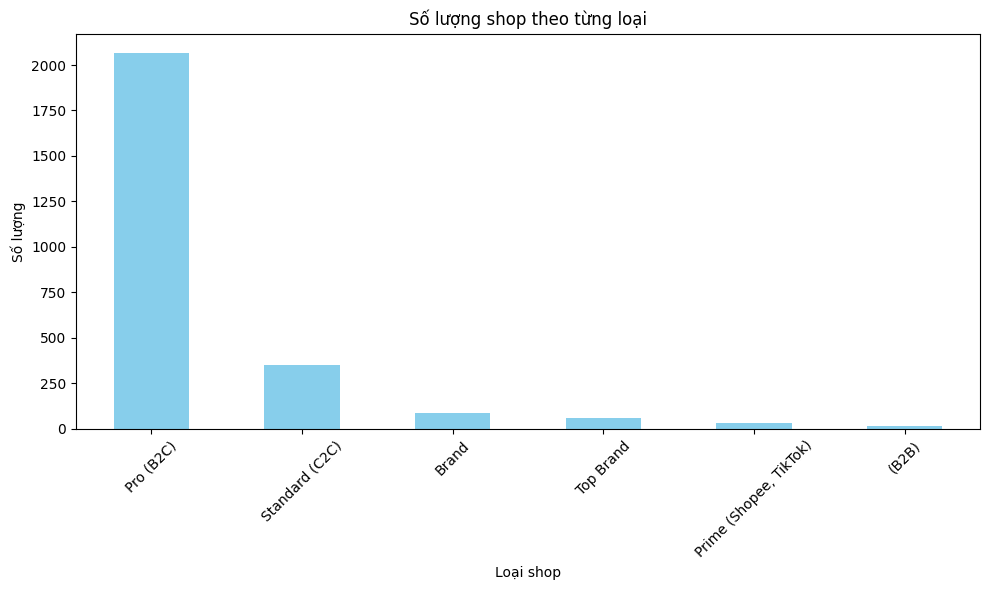

In [47]:
plt.figure(figsize=(10, 6))
sequence_shop_df["shop_type_name"].value_counts().plot(kind='bar', color='skyblue')

plt.title('Số lượng shop theo từng loại')
plt.xlabel('Loại shop')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nhận định:

1. Hầu hết các shop thuộc loại Pro (B2C), với tỉ lệ chiếm khoảng 79% trong tổng số.

2. Loại shop Standard (C2C) cũng chiếm tỉ lệ nhỏ, khoảng 13% so với tất cả các shop.

3. Các loại shop như Brand, Top Brand, Prime (Shopee, TikTok) và (B2B) chiếm tỷ lệ rất thấp, dưới 8% tổng thể — trong đó Brand và Top Brand có số lượng lần lượt là 86 và 59 shops.

In [51]:
x= sequence_shop_df["shop__seniority"].value_counts()
x

shop__seniority
4      120
1      116
3      106
12      95
8       79
      ... 
98       1
119      1
117      1
106      1
104      1
Name: count, Length: 115, dtype: int64

Nhận định:
1. Phần lớn các shop có thâm niên thấp, tập trung mạnh nhất trong khoảng 1–12 tháng, đặc biệt là các mốc 4 tháng (120 shops), 1 tháng (116 shops) và 3 tháng (106 shops) — điều này cho thấy số lượng shop mới tham gia hệ thống là rất lớn.

2. Các mốc từ 24–63 tháng vẫn có sự hiện diện đáng kể (từ 20–50 shops mỗi mốc), cho thấy một nhóm shop trung thành và hoạt động bền vững đang duy trì lâu dài.

3. Shop có thâm niên trên 70 tháng trở lên trở nên hiếm dần — nhiều mốc chỉ có từ 1–6 shops, và mốc cao nhất là 141 tháng chỉ có 1 shop.

Đề xuất

1. Phân chia nhóm theo thâm niên của shop. Cụ thể như sau

    a. Nhóm 1 - Mới với thâm niên <= 12 tháng hoạt động

    b. Nhóm 2 - Trung bình với thâm niên <= 36 tháng hoạt động 

    c. Nhóm 3 - Lâu năm với thâm niên > 36 tháng hoạt động 


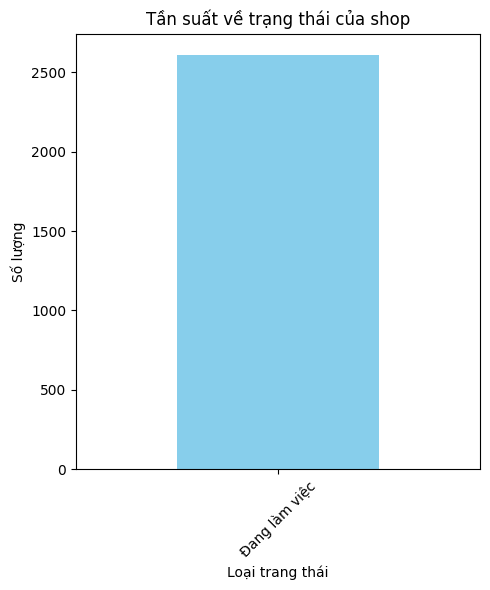

In [52]:
plt.figure(figsize=(5, 6))
sequence_shop_df["shop_status_name"].value_counts().plot(kind='bar', color='skyblue')

plt.title('Tần suất về trạng thái của shop')
plt.xlabel('Loại trang thái')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Phân chia thâm niên shop thành các nhóm

In [53]:
def map_seniority(months):
    if months <= 12:
        return 'Nhóm 1 - Mới'
    elif months <= 36:
        return 'Nhóm 2 - Trung bình'
    else:
        return 'Nhóm 3 - Lâu năm'

sequence_shop_df["seniority_group"] = sequence_shop_df["shop__seniority"].apply(map_seniority)


In [54]:
sequence_shop_df

,pkg_order,num_actions,unique_actions,action_diversity,action_sequence_str,shop_id,shop_type_name,shop_status_name,shop__seniority,shop__categories,address__ward_name,address__district_name,address__province_name,seniority_group
0,1000495161,13,6,0.461538,distributorCfmDeliver → confirmTmpDeliveredPac...,6809ae0a-79ac-4e26-95a3-43ad0a6e4cd3,Pro (B2C),Đang làm việc,2,NaN,Phường Hạ Đình,Quận Thanh Xuân,Hà Nội,Nhóm 1 - Mới
13,1000954392,1,1,1.000000,distributorCfmDeliver,65793d78-ace0-4ce0-8bda-476a0a6e4d76,Brand,Đang làm việc,18,NaN,Phường Hoàng Liệt,Quận Hoàng Mai,Hà Nội,Nhóm 2 - Trung bình
14,1001041791,6,2,0.333333,verifySessionPackage → distributorCfmDeliver →...,624cff70-cb04-49a8-999a-448a0a6e4e65,Pro (B2C),Đang làm việc,39,"[""fashion_new""]",Phường Tứ Liên,Quận Tây Hồ,Hà Nội,Nhóm 3 - Lâu năm
20,1001385328,1,1,1.000000,distributorCfmDeliver,5dccf6d1-71b8-442f-9c2e-42a90a0a0267,Pro (B2C),Đang làm việc,68,"[""fashion_new""]",Thị trấn Cầu Kè,Huyện Cầu Kè,Trà Vinh,Nhóm 3 - Lâu năm
21,1001614734,4,4,1.000000,privateNotePackage → putPackages2Bag → smartSc...,23db92aa-ff83-4169-b624-d36a75bf74e4,Pro (B2C),Đang làm việc,1,"[""fashion_new""]",Xã Trực Thuận,Huyện Trực Ninh,Nam Định,Nhóm 1 - Mới
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6377,4010454385,5,4,0.800000,distributorCfmDeliver → confirmTmpDeliveredPac...,b3fcc7e6-a271-4cd6-8e72-6f89a883ad91,Top Brand,Đang làm việc,10,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Nhóm 1 - Mới
6382,4010454527,11,6,0.545455,updateDeliverWorkshiftByCod → NVBCConfirmImage...,b3fcc7e6-a271-4cd6-8e72-6f89a883ad91,Top Brand,Đang làm việc,10,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Nhóm 1 - Mới
6393,4010454968,3,1,0.333333,verifySessionPackage → verifySessionPackage → ...,67a58ef5-8954-48e1-b303-46650a6e4e65,Top Brand,Đang làm việc,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Nhóm 1 - Mới
6396,4010455063,2,2,1.000000,putPackages2Bag → putInBox,67a58ef5-8954-48e1-b303-46650a6e4e65,Top Brand,Đang làm việc,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Nhóm 1 - Mới


C:\Users\yennt84\AppData\Local\Temp\ipykernel_9984\296868372.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seniority_df, x="seniority_group", y="count", palette="Set2")


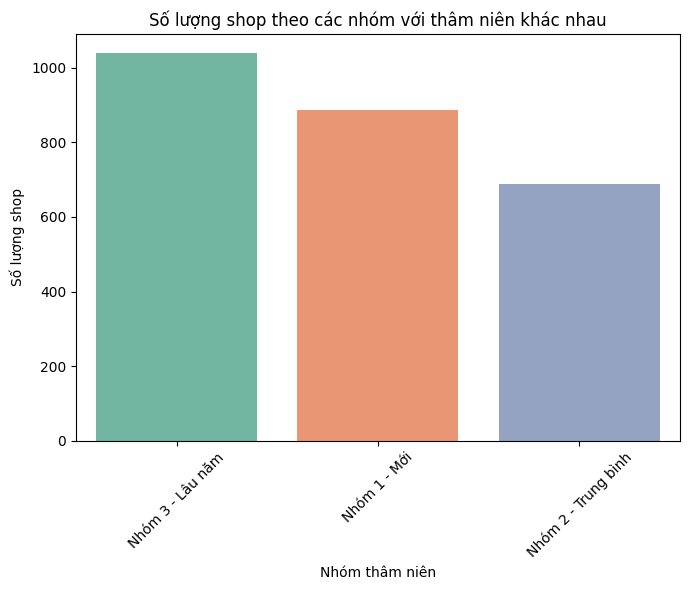

In [55]:
seniority_df = sequence_shop_df["seniority_group"].value_counts().reset_index()
seniority_df.columns = ["seniority_group", "count"]

plt.figure(figsize=(7, 6))
sns.barplot(data=seniority_df, x="seniority_group", y="count", palette="Set2")

plt.title("Số lượng shop theo các nhóm với thâm niên khác nhau")
plt.xlabel("Nhóm thâm niên")
plt.ylabel("Số lượng shop")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [57]:
x = sequence_shop_df["seniority_group"].value_counts()
x

seniority_group
Nhóm 3 - Lâu năm       1039
Nhóm 1 - Mới            886
Nhóm 2 - Trung bình     687
Name: count, dtype: int64

Nhận định:

1. Nhóm 3 – Lâu năm (trên 36 tháng) chiếm tỷ trọng cao nhất (1.039 shops – khoảng 41%), cho thấy hệ thống có một tập khách hàng trung thành ổn định.

2. Nhóm 1 – Mới (≤ 12 tháng) có 886 shops (35%), thể hiện hệ thống đang thu hút được lượng lớn shop mới – đây là nhóm cần được quan tâm về onboarding và hỗ trợ khởi đầu.

3. Nhóm 2 – Trung bình (13–36 tháng) với 687 shops (27%), là nhóm chuyển tiếp tiềm năng, có thể tác động để tăng mức độ gắn bó lâu dài.

In [60]:
x = sequence_shop_df["shop__categories"].value_counts()
x

shop__categories
["fashion_new"]                                                         396
["others"]                                                              152
["fashion"]                                                             116
[]                                                                       99
["accessories"]                                                          58
                                                                       ... 
{"3":"food_others","1":"family","2":"stationery","0":"fashion"}           1
["fashion_new","accessories","stationery_new","home_care","fragile"]      1
["stationery_new","houseware","others"]                                   1
{"1":"family","0":"fashion","2":"food_others"}                            1
["cosmetics","medicines","houseware","baby_mom"]                          1
Name: count, Length: 163, dtype: int64

In [61]:
cat = pd.read_csv("x.csv")

extract categories

In [64]:
import ast
from collections import Counter

def extract_categories(raw_str):
    try:
        obj = ast.literal_eval(raw_str)
        if isinstance(obj, dict):
            return list(obj.values())
        elif isinstance(obj, list):
            return obj
        else:
            return []
    except Exception:
        return []

cat['category_list'] = cat['shop__categories'].apply(extract_categories)

all_categories = []
for _, row in cat.iterrows():
    all_categories.extend(row['category_list'] * row['count'])

category_counts = pd.Series(Counter(all_categories)).sort_values(ascending=False)

print(category_counts)


fashion_new         532
others              259
accessories         162
fashion             143
cosmetics           129
houseware           100
accessories_new      84
home_appliances      74
baby_mom             71
medicines            69
food_others          66
elec_accessories     45
home_care            40
dry_food             37
stationery_new       28
family               26
technology           15
stationery           15
fragile              12
voucher               8
dtype: int64


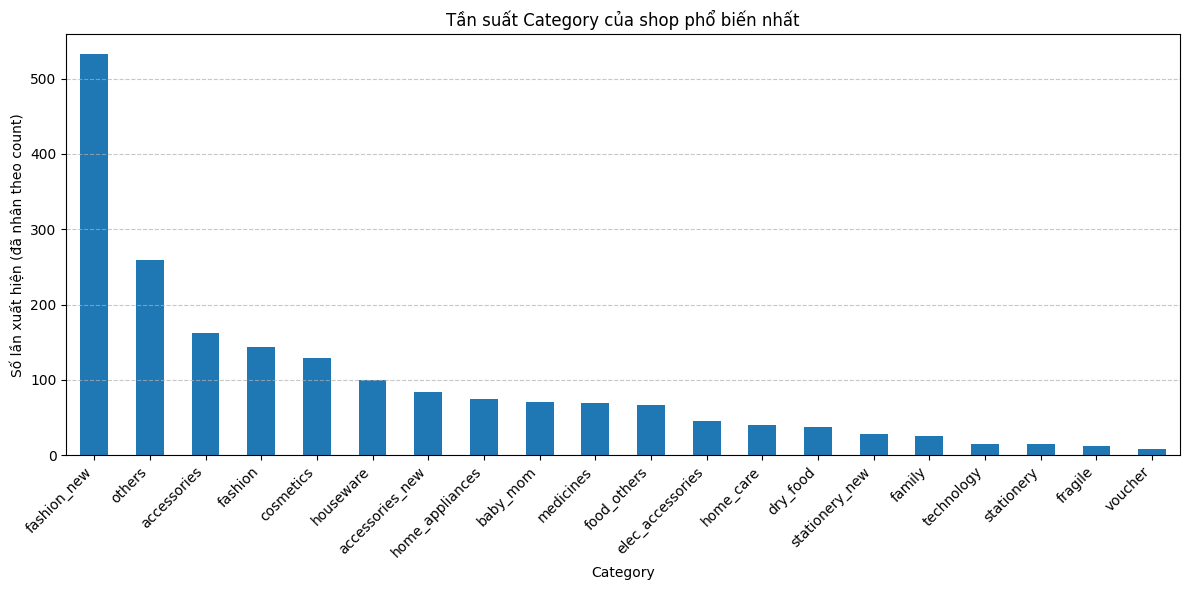

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
category_counts.head(20).plot(kind='bar')  

plt.title('Tần suất Category của shop phổ biến nhất')
plt.xlabel('Category')
plt.ylabel('Số lần xuất hiện (đã nhân theo count)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Nhận định:

1. fashion_new dẫn đầu vượt trội với 532 lượt, cho thấy xu hướng tiêu dùng nghiêng mạnh về ngành hàng thời trang mới.

2. others đứng thứ hai (259), phản ánh tỷ trọng lớn từ các mặt hàng chưa được phân loại rõ ràng.

3. Nhóm accessories và cosmetics, houseware giữ vị trí cao, thể hiện mức độ phổ biến ổn định.

4. Các category như voucher, fragile, stationery có tần suất thấp, mang tính đặc thù hoặc xuất hiện theo mùa vụ.

Đề xuất:

1. Sự tồn tại song song của các nhóm _new và gốc cho thấy tiềm năng chuẩn hóa hoặc tái phân nhóm để tối ưu phân tích.



Thống kê số lần xuất hiện của từng chuỗi trong từng loại shop_type_name

In [80]:
def top_sequences_by_shop_type(sequence_shop_df, top_n=3):
    group_counts = sequence_shop_df.groupby(['shop_type_name', 'action_sequence_str']) \
                                   .size().reset_index(name='count')
    
    # Lấy top N chuỗi phổ biến nhất mỗi nhóm shop_type_name
    top_sequences = group_counts.sort_values(['shop_type_name', 'count'], ascending=[True, False]) \
                                .groupby('shop_type_name').head(top_n).reset_index(drop=True)
    
    return top_sequences
top_sequences_df = top_sequences_by_shop_type(sequence_shop_df, top_n=10)
top_sequences_df

,shop_type_name,action_sequence_str,count
0,(B2B),distributorCfmDeliver,4
1,(B2B),verifySessionPackage,3
2,(B2B),assignCodPicking,2
3,(B2B),verifySessionPackage → distributorCfmDeliver,2
4,(B2B),distributorCfmDeliver → verifySessionPackage →...,1
5,(B2B),printfPackage,1
6,(B2B),privateNotePackage → changeAttributeForSurplus,1
7,(B2B),verifySessionPackage → distributorCfmDeliver →...,1
8,Brand,distributorCfmDeliver,20
9,Brand,privateNotePackage,14


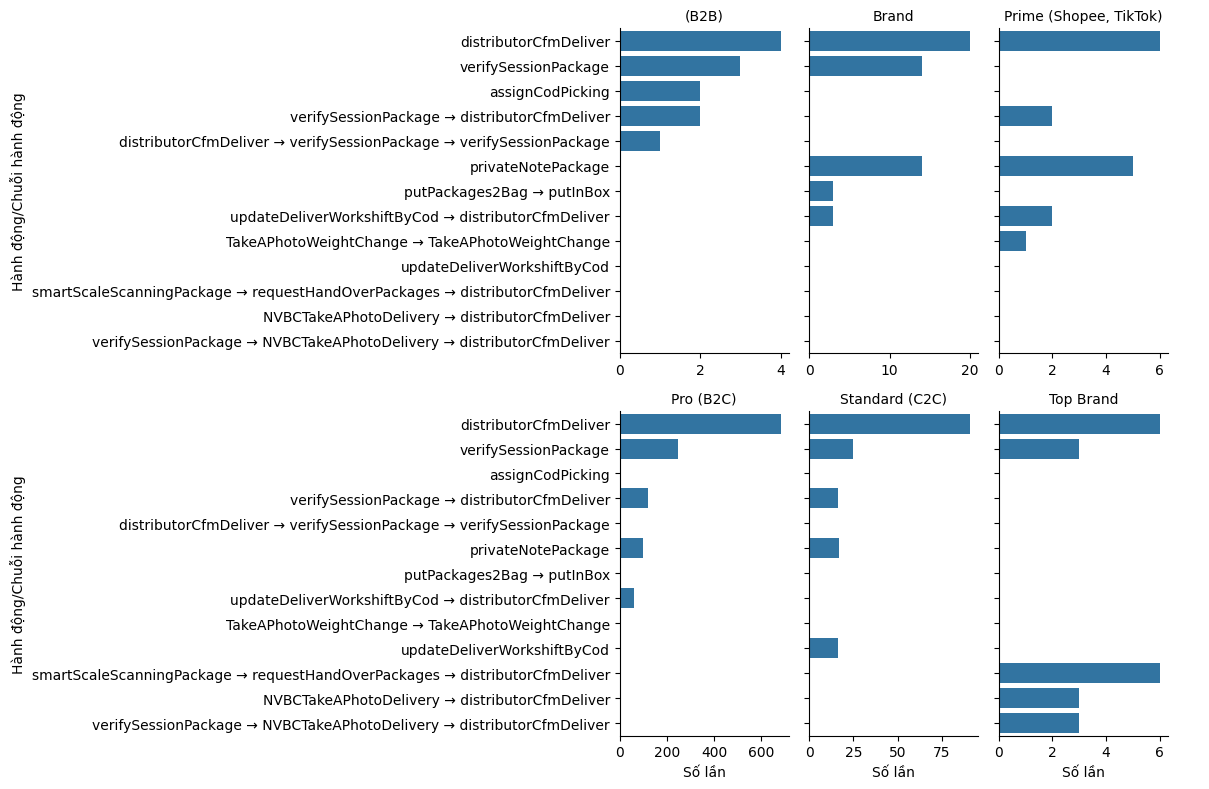

In [79]:
g = sns.catplot(
    data=top_sequences_df, 
    x='count', 
    y='action_sequence_str', 
    col='shop_type_name',
    kind='bar', 
    col_wrap=3, 
    height=4, 
    sharex=False
)

g.set_titles('{col_name}')
g.set_axis_labels('Số lần', 'Hành động/Chuỗi hành động')
g.tight_layout()
plt.show()


Nhận định tổng quan:

1. distributorCfmDeliver là hành động phổ biến nhất, xuyên suốt giữa các nhóm shop -> Đây là hành động quan trọng trong quá trình xử lý đơn

2. Các hành động đi kèm như  verifySessionPackage, privateNotePackage, updateDeliverWorkshiftByCod cũng thường xuất hiện kế tiếp hoặc kèm trong chuỗi.

Nhận định chi tiết:

1. B2C
- Là nhóm có số lượng chuỗi lặp nhiều nhất (682 lượt với distributorCfmDeliver).
- Một số pattern rõ ràng như:
     - verifySessionPackage → distributorCfmDeliver
     - updateDeliverWorkshiftByCod → distributorCfmDeliver
     - Một số hành động lặp như verifySessionPackage → verifySessionPackage và distributorCfmDeliver → distributorCfmDeliver

-> Đây là nhóm có quy trình thực hiện khá chuẩn, tuy nhiên vẫn tồn tại về việc lặp lại thao tác, cần kiểm tra và đưa ra giải pháp cải thiện

2. B2B
- Có số lượng chuỗi hành động ít nhất, với hầu hết chỉ xảy ra 1–4 lần.
- Chuỗi đơn giản, ít phân nhánh: chỉ có 1 số chuỗi dài đáng kể. 

-> Shop B2B ít thao tác, quy trình ổn định nhưng thiếu tính đa dạng.

3. C2C
- Chuỗi ngắn, đơn giản.
- Lặp nhiều nhất vẫn là hành động distributorCfmDeliver, nhưng ít hơn B2C rất nhiều.

-> Đây có thể là nhóm đơn giản nhất về nghiệp vụ.

4. Brand
- Số lượng chuỗi hành động đa dạng hơn, với nhiều chuỗi > 2 bước.
- Chuỗi như updateDeliverWorkshiftByCod → distributorCfmDeliver → confirmTmpDeliveredPackageStatus... cho thấy:
    - Giao hàng thương hiệu có thể liên quan đến quy trình kiểm soát chất lượng hoặc xử lý phản hồi.
    - Có1 số hành động như RefundBill gợi ý tỷ lệ đổi trả hoặc phản hồi cao hơn.

5. Top Brand
- Nổi bật vì có những chuỗi dài, mang tính kiểm soát: smartScaleScanningPackage → requestHandOverPackages...
- Sử dụng nhiều hành động liên quan hình ảnh: NVBCTakeAPhotoDelivery, NVBCConfirmImageWorkshift

-> Nhóm này có thể là những shop lớn với quy trình kiểm tra chất lượng nghiêm ngặt hơn

6. Prime
- Xu hướng tương tự Brand, nhưng có nhiều chuỗi dài phức tạp.
- Một vài chuỗi có tới 9+ bước phản ánh quá trình xử lý phức tạp và có khả năng bị lỗi nhiều.


In [81]:
sequences_df_filtered = sequences_df[sequences_df['num_actions'] >= 2]

In [87]:
x = sequences_df_filtered["action_sequence_str"].value_counts()
x

action_sequence_str
verifySessionPackage → distributorCfmDeliver                                                                                                                                                                                                                                                                 140
updateDeliverWorkshiftByCod → distributorCfmDeliver                                                                                                                                                                                                                                                           75
distributorCfmDeliver → distributorCfmDeliver                                                                                                                                                                                                                                                                 47
verifySessionPackage → verifySessionPackage                      

Nhận định: 

- Các chuỗi hành động phổ biến
    - verifySessionPackage → distributorCfmDeliver (140 lần) là luồng thao tác chuẩn
    - updateDeliverWorkshiftByCod → distributorCfmDeliver (75 lần) thể hiện quy trình cập nhật ca trước giao.
- Nhiều chuỗi có các hành động lặp lại
    - Ví dụ: distributorCfmDeliver → distributorCfmDeliver; verifySessionPackage → verifySessionPackage
- Các chuỗi dài phức tạp
    - Ví dụ: 
        - privateNotePackage → putPackages2Bag → smartScaleScanningPackage → assignBagWithIdentifyBag (22 lần)

        - distributorCfmDeliver → confirmTmpDeliveredPackageStatus → updateDelayDeliveringByCod → RefundBill → distributorCfmDeliver có khả năng cao tương đồng với distributorCfmDeliver → updateDelayDeliveringByCod → confirmTmpDeliveredPackageStatus → RefundBill → distributorCfmDeliver 

        - privateNotePackage → privateNotePackage → privateNotePackage → putPackages2Bag → smartScaleScanningPackage → assignBagWithIdentifyBag: quy trình xử lý đóng gói và phân loại đơn hàng tại điểm tập kết (hub/bưu cục), bao gồm: Ghi chú nội bộ → Gom đơn → Cân quét mã → Gán mã túi.

        - updateDeliverWorkshiftByCod → distributorCfmDeliver → confirmTmpDeliveredPackageStatus → updateDelayDeliveringByCod → RefundBill: Thể hiện quy trình xử lý đơn hàng từ việc cập nhật ca giao hàng cho đơn hàng thu hộ đến xác nhận phân phối giao hàng tới xác nhận tạm thời, đánh dấu delay, và hoàn tiền nếu không giao được.

Xem xét các chuỗi hành động dài bất thường

In [89]:
sequences_df

,pkg_order,num_actions,unique_actions,action_diversity,action_sequence_str
0,1000495161,13,6,0.461538,distributorCfmDeliver → confirmTmpDeliveredPac...
1,1000954392,1,1,1.000000,distributorCfmDeliver
2,1001041791,6,2,0.333333,verifySessionPackage → distributorCfmDeliver →...
3,1001385328,1,1,1.000000,distributorCfmDeliver
4,1001614734,4,4,1.000000,privateNotePackage → putPackages2Bag → smartSc...
...,...,...,...,...,...
2607,4010454385,5,4,0.800000,distributorCfmDeliver → confirmTmpDeliveredPac...
2608,4010454527,11,6,0.545455,updateDeliverWorkshiftByCod → NVBCConfirmImage...
2609,4010454968,3,1,0.333333,verifySessionPackage → verifySessionPackage → ...
2610,4010455063,2,2,1.000000,putPackages2Bag → putInBox


In [90]:
sequences_df.sort_values(by='unique_actions', ascending=False, inplace=True)

In [93]:
sequences_df.head(20)

,pkg_order,num_actions,unique_actions,action_diversity,action_sequence_str
1475,1579552688,14,10,0.714286,changePackageStatus → assignCodPicking → updat...
2195,1845749231,13,10,0.769231,changePackageStatus → changeCodForPackagesInCa...
2006,1772906225,12,10,0.833333,NVBCTakeAPhotoDelivery → NVBCConfirmImageWorks...
1459,1571672060,17,9,0.529412,distributorCfmDeliver → updateDelayDeliveringB...
1009,1395852183,12,9,0.750000,assignCodPicking → confirmTmpPickedPackageStat...
309,1122976066,9,9,1.000000,RefundBill → confirmTmpDeliveredPackageStatus ...
1830,1716558409,10,9,0.900000,distributorCfmDeliver → privateNotePackage → c...
991,1391170063,20,9,0.450000,updateDeliverWorkshiftByCod → distributorCfmDe...
1741,1675131291,13,9,0.692308,verifySessionPackage → updateDeliverWorkshiftB...
987,1389779439,9,9,1.000000,verifySessionPackage → changeDelieverCartId → ...


In [ ]:
sequences_df_2 = sequences_df.merge(
    df_cleaned[['pkg_order', 'shop_id', 'shop_type_name', 'shop_status_name', 'shop__seniority', 
        'shop__categories', 'address__ward_name', 'address__district_name', 'address__province_name']],
    on='pkg_order', how='left'
).drop_duplicates()

In [98]:
sequence_shop_df

,pkg_order,num_actions,unique_actions,action_diversity,action_sequence_str,shop_id,shop_type_name,shop_status_name,shop__seniority,shop__categories,address__ward_name,address__district_name,address__province_name,seniority_group
0,1000495161,13,6,0.461538,distributorCfmDeliver → confirmTmpDeliveredPac...,6809ae0a-79ac-4e26-95a3-43ad0a6e4cd3,Pro (B2C),Đang làm việc,2,NaN,Phường Hạ Đình,Quận Thanh Xuân,Hà Nội,Nhóm 1 - Mới
13,1000954392,1,1,1.000000,distributorCfmDeliver,65793d78-ace0-4ce0-8bda-476a0a6e4d76,Brand,Đang làm việc,18,NaN,Phường Hoàng Liệt,Quận Hoàng Mai,Hà Nội,Nhóm 2 - Trung bình
14,1001041791,6,2,0.333333,verifySessionPackage → distributorCfmDeliver →...,624cff70-cb04-49a8-999a-448a0a6e4e65,Pro (B2C),Đang làm việc,39,"[""fashion_new""]",Phường Tứ Liên,Quận Tây Hồ,Hà Nội,Nhóm 3 - Lâu năm
20,1001385328,1,1,1.000000,distributorCfmDeliver,5dccf6d1-71b8-442f-9c2e-42a90a0a0267,Pro (B2C),Đang làm việc,68,"[""fashion_new""]",Thị trấn Cầu Kè,Huyện Cầu Kè,Trà Vinh,Nhóm 3 - Lâu năm
21,1001614734,4,4,1.000000,privateNotePackage → putPackages2Bag → smartSc...,23db92aa-ff83-4169-b624-d36a75bf74e4,Pro (B2C),Đang làm việc,1,"[""fashion_new""]",Xã Trực Thuận,Huyện Trực Ninh,Nam Định,Nhóm 1 - Mới
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6377,4010454385,5,4,0.800000,distributorCfmDeliver → confirmTmpDeliveredPac...,b3fcc7e6-a271-4cd6-8e72-6f89a883ad91,Top Brand,Đang làm việc,10,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Nhóm 1 - Mới
6382,4010454527,11,6,0.545455,updateDeliverWorkshiftByCod → NVBCConfirmImage...,b3fcc7e6-a271-4cd6-8e72-6f89a883ad91,Top Brand,Đang làm việc,10,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Nhóm 1 - Mới
6393,4010454968,3,1,0.333333,verifySessionPackage → verifySessionPackage → ...,67a58ef5-8954-48e1-b303-46650a6e4e65,Top Brand,Đang làm việc,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Nhóm 1 - Mới
6396,4010455063,2,2,1.000000,putPackages2Bag → putInBox,67a58ef5-8954-48e1-b303-46650a6e4e65,Top Brand,Đang làm việc,4,NaN,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Nhóm 1 - Mới


In [99]:
sequences_df_2 = sequences_df_2.merge(
    sequence_shop_df[['pkg_order', 'shop_type_name','seniority_group', 'shop_status_name', 'shop__seniority',
        'shop__categories', 'address__ward_name', 'address__district_name', 'address__province_name']],
    on='pkg_order', how='left'
).drop_duplicates()

In [100]:
sequences_df_2

,pkg_order,num_actions,unique_actions,action_diversity,action_sequence_str,shop_id,shop_type_name_x,shop_status_name_x,shop__seniority_x,shop__categories_x,...,address__district_name_x,address__province_name_x,shop_type_name_y,seniority_group,shop_status_name_y,shop__seniority_y,shop__categories_y,address__ward_name_y,address__district_name_y,address__province_name_y
0,1579552688,14,10,0.714286,changePackageStatus → assignCodPicking → updat...,83675c8e-028f-43ad-b432-3b5cf8a57c8c,Standard (C2C),Đang làm việc,7,NaN,...,Huyện Ba Tơ,Quảng Ngãi,Standard (C2C),Nhóm 1 - Mới,Đang làm việc,7,NaN,Xã Ba Vì,Huyện Ba Tơ,Quảng Ngãi
1,1845749231,13,10,0.769231,changePackageStatus → changeCodForPackagesInCa...,27c32028-c96e-490b-b625-c7de95cb2350,Standard (C2C),Đang làm việc,0,"[""accessories_new""]",...,Huyện Ba Tơ,Quảng Ngãi,Standard (C2C),Nhóm 1 - Mới,Đang làm việc,0,"[""accessories_new""]",Thị trấn Ba Tơ,Huyện Ba Tơ,Quảng Ngãi
2,1772906225,12,10,0.833333,NVBCTakeAPhotoDelivery → NVBCConfirmImageWorks...,575dcdc4-9972-4aa6-8d2e-cbaf754489d4,Brand,Đang làm việc,10,NaN,...,Chương Mỹ,Hà Nội,Brand,Nhóm 1 - Mới,Đang làm việc,10,NaN,Thị trấn Chúc Sơn,Chương Mỹ,Hà Nội
3,1571672060,17,9,0.529412,distributorCfmDeliver → updateDelayDeliveringB...,5abb4511-04e4-4258-b07f-14ac0a0a0269,Pro (B2C),Đang làm việc,88,[],...,Huyện Văn Giang,Hưng Yên,Pro (B2C),Nhóm 3 - Lâu năm,Đang làm việc,88,[],Xã Xuân Quan,Huyện Văn Giang,Hưng Yên
4,1395852183,12,9,0.750000,assignCodPicking → confirmTmpPickedPackageStat...,39aa6505-88be-45de-9c87-eb5580372dcd,Standard (C2C),Đang làm việc,19,"[""dry_food""]",...,Huyện Bù Gia Mập,Bình Phước,Standard (C2C),Nhóm 2 - Trung bình,Đang làm việc,19,"[""dry_food""]",Xã Phú Nghĩa,Huyện Bù Gia Mập,Bình Phước
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,1005139218,2,1,0.500000,distributorCfmDeliver → distributorCfmDeliver,fe714efb-7990-4a02-be13-dc6866d9a81b,Pro (B2C),Đang làm việc,12,NaN,...,Huyện Sông Lô,Vĩnh Phúc,Pro (B2C),Nhóm 1 - Mới,Đang làm việc,12,NaN,Xã Hải Lựu,Huyện Sông Lô,Vĩnh Phúc
2608,1006345094,1,1,1.000000,verifySessionPackage,5b2e1a11-b7f4-481b-9f98-79320a0a0269,Pro (B2C),Đang làm việc,85,"[""fashion_new""]",...,Quận 12,TP Hồ Chí Minh,Pro (B2C),Nhóm 3 - Lâu năm,Đang làm việc,85,"[""fashion_new""]",Phường Đông Hưng Thuận,Quận 12,TP Hồ Chí Minh
2609,1007224799,1,1,1.000000,distributorCfmDeliver,5f65d835-eb08-405a-9f42-43ab0a6e4c25,Pro (B2C),Đang làm việc,58,"[""fashion_new""]",...,Quận Bình Tân,TP Hồ Chí Minh,Pro (B2C),Nhóm 3 - Lâu năm,Đang làm việc,58,"[""fashion_new""]",Phường Bình Hưng Hòa,Quận Bình Tân,TP Hồ Chí Minh
2610,3801315047,2,1,0.500000,distributorCfmDeliver → distributorCfmDeliver,62b40f26-d95c-403d-8ded-44450a6e4e0c,"Prime (Shopee, TikTok)",Đang làm việc,36,[],...,NaN,Hà Nội,"Prime (Shopee, TikTok)",Nhóm 2 - Trung bình,Đang làm việc,36,[],NaN,NaN,Hà Nội


In [103]:
sequences_df_2[sequences_df_2["pkg_order"] == 1122976066]

,pkg_order,num_actions,unique_actions,action_diversity,action_sequence_str,shop_id,shop_type_name_x,shop_status_name_x,shop__seniority_x,shop__categories_x,...,address__district_name_x,address__province_name_x,shop_type_name_y,seniority_group,shop_status_name_y,shop__seniority_y,shop__categories_y,address__ward_name_y,address__district_name_y,address__province_name_y
5,1122976066,9,9,1.0,RefundBill → confirmTmpDeliveredPackageStatus ...,5e8b047c-fff4-4450-ac15-46630a6e4c46,Pro (B2C),Đang làm việc,63,"[""fashion_new""]",...,Quận Đống Đa,Hà Nội,Pro (B2C),Nhóm 3 - Lâu năm,Đang làm việc,63,"[""fashion_new""]",NaN,Quận Đống Đa,Hà Nội


Nhận định:

- ĐH: 1579552688 với Chuỗi hành động changePackageStatus → assignCodPicking → updateDelayPickingByCod → confirmTmpPickedPackageStatus → PickupBill → assignCodPicking → updatePickedByCod → PickupBill → confirmTmpPickedPackageStatus → distributorCfmDeliver → RefundBill → updateDelayDeliveringByCod → confirmTmpDeliveredPackageStatus → distributorCfmDeliver có dấu hiệu delay nhiều lần ban đầu giao cho một COD, sau đó chuyển người, xử lý lại. Tuy nhiên, đơn vẫn được hoàn tất giao thành công, thể hiện cơ chế sửa sai bằng thao tác lặp lại (C2C - Nhóm 1)

- ĐH: 1845749231 với chuỗi hành động changePackageStatus → changeCodForPackagesInCart → assignCodPicking → updateDelayPickingByCod → confirmTmpPickedPackageStatus → PickupBill → assignCodPicking → updatePickedByCod → PickupCrossProvinceBill → PickupBill → confirmTmpPickedPackageStatus → smartScaleScanningPackage → printfPackage: thao tác điều chỉnh liên tục: đổi COD, cập nhật delay, xác nhận lại → cho thấy đơn bị xử lý thủ công khá nhiều. Hệ thống vẫn đảm bảo các bước cuối (nhập kho, cân, in tem), cho thấy đơn đã được xử lý thành công (C2C - Nhóm 1).

- ĐH: 1122976066 với chuỗi hành động RefundBill → confirmTmpDeliveredPackageStatus → updateDelayDeliveringByCod → privateNotePackage → updateDeliverWorkshiftByCod → printfPackage → verifySessionPackage → saveIsfrageImages → distributorCfmDeliver: chuỗi xử lý lại sau khi giao hàng thất bại, bao gồm: Hoàn tiền → Điều phối lại → In tem → Giao lại. privateNotePackage, updateDeliverWorkshiftByCod, verifySessionPackage cho thấy xử lý mang tính thủ công cao. Cuối cùng đơn đã được giao lại và chuyển sang trạng thái giao hàng thành công. (B2C - Nhóm 3)

- ĐH: 1389779439 với chuỗi hành động verifySessionPackage → changeDelieverCartId → changeCustomerFirstAddress → changeCustomerLastAddress → changeTransferStation → editPackage → putPackages2Bag → smartScaleScanningPackage → assignBagWithIdentifyBag: xử lý lại đơn trước khi đưa vào luồng vận hành, với các hành động như thay đổi thông tin vận chuyển (địa chỉ, xe, tuyến); điều chỉnh nội dung đơn hàng; đóng gói và chuẩn bị gửi lại. (B2C - Nhóm 3)

- ĐH: 1395852183 với chuỗi hành động assignCodPicking → confirmTmpPickedPackageStatus → updatePickedByCod → PickupBill → PickupCrossProvinceBill → putPackages2Bag → smartScaleScanningPackage → smartScaleScanningPackage → takeOutPackages2Bag → putPackages2Bag → smartScaleScanningPackage → assignBagWithIdentifyBag: đơn hàng có dấu hiệu đóng gói bị lỗi/lặp lại: lặp put → scan → take out → put → scan => bị sai thao tác hoặc hệ thống chưa ghi nhận đúng lần đầu => cần kiểm tra nếu lặp lại ở nhiều đơn khác hoặc cùng 1 nhân sự/điểm giao nhận → để tự động cảnh báo thao tác thừa. (C2C - Nhóm 2 - Trung bình)